# Udacity Capstone - Working Title

## Table of Contents

<ul>
<li><a href="#introduction">Introduction</a></li>
<li><a href="#feature">The Feature Variables</a></li>
<li><a href="#import1">Import Data</a></li>
<li><a href="#assess">Data Assessment</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#target">Separation of Target Variables</a></li>
<li><a href="#Null">Creation of Null Values</a></li>
<li><a href="#numpy">Pandas Dataframe to Numpy Array</a></li>
<li><a href="#standardization">Standardization</a></li>
<li><a href="#train_test_split">Train_test_split</a></li>
<li><a href="#oversampling">Oversampling</a></li>
<li><a href="#originalMLP">Origial MLP</a></li>
<li><a href="#conclusion">Conclusion</a></li> 
<li><a href="#references">References</a></li>
</ul>

<a id='introduction'></a>
## Introduction

<a id='feature'></a>
## The Feature Variables
Below is a snapshot of the feature variables in this analysis:
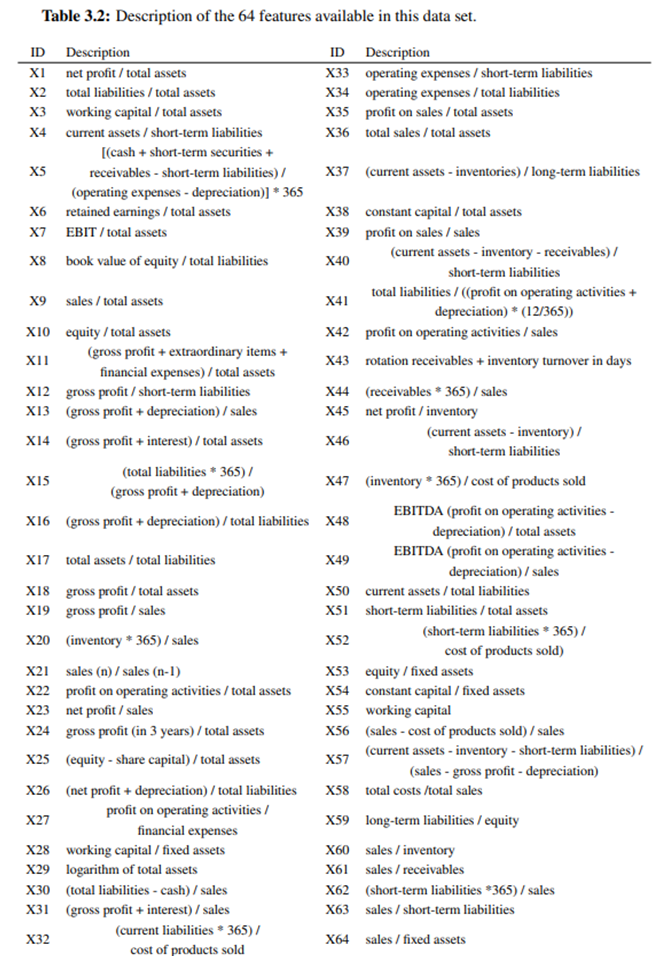

This image comes from Reference 7 of the References Section.

<a id='import1'></a>
## Import Data
This section imports the csv files to pandas dataframes.

In [2]:
# This imports the libraries needed to upload the 
# csv.files.
import os
import numpy as np
import pandas as pd

# This checks the current working directory.
os.getcwd()

'C:\\Users\\bgcam\\Desktop\\CAPSTONE\\capstone\\udacity-capstone'

In [3]:
# This changes the working directory in order to 
# upload the csv files.

new_path = "data"
os.chdir(new_path)

# This confirms that the current working directory
# was changed to new_path.
os.getcwd()

'C:\\Users\\bgcam\\Desktop\\CAPSTONE\\capstone\\udacity-capstone\\data'

In [4]:
# This converts the csv files to pandas dataframes
# for each of the five years.
year_one_df = pd.read_csv("1year.csv")
year_two_df = pd.read_csv("2year.csv")
year_three_df = pd.read_csv("3year.csv")
year_four_df = pd.read_csv("4year.csv")
year_five_df = pd.read_csv("5year.csv")

C:\Users\bgcam\Anaconda3\envs\py36\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0,1,2,5,6,8,9,10,13,17,21,23,24,28,34,35,37,47,50,54,56,58) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\bgcam\Anaconda3\envs\py36\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (14,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\bgcam\Anaconda3\envs\py36\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0,1,2,5,6,7,9,10,13,14,15,16,17,21,23,24,25,28,33,34,35,37,47,49,50,56,58) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<a id='assess'></a>
## Data Assessment
This section identifies tidiness and quality issues that need to be cleaned for each dataframe from the five years.


### Assessment: year_one_df

In [5]:
# This tells us the number of rows
# and columns in year_one_df.

print("The number of rows and columns (rows, columns) are: {}."
      .format(year_one_df.shape))

The number of rows and columns (rows, columns) are: (7027, 65).


**Visual Assessment**

In [6]:
# This eliminates the "max_columns" and 
# "max_rows" in visual displays of dataframes.
# This comes from Reference 1.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# This returns a visual assessment of year_one_df.
# This comes from Reference 2.
year_one_df.sample(20)

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,attr11,attr12,attr13,attr14,attr15,attr16,attr17,attr18,attr19,attr20,attr21,attr22,attr23,attr24,attr25,attr26,attr27,attr28,attr29,attr30,attr31,attr32,attr33,attr34,attr35,attr36,attr37,attr38,attr39,attr40,attr41,attr42,attr43,attr44,attr45,attr46,attr47,attr48,attr49,attr50,attr51,attr52,attr53,attr54,attr55,attr56,attr57,attr58,attr59,attr60,attr61,attr62,attr63,attr64,class
6609,0.056718,0.53543,0.17644,1.3687,-29.645,0.12568,0.070761,0.867,1.0514,0.46422,0.070761,0.14788,0.066220,0.070761,1764.4,0.20687,1.8676,0.070761,0.042304,62.3290,1.1702,0.079847,0.033909,0.16294,0.46422,0.18064,0.5019,0.51134,4.5272,0.307740,0.042304,109.78,3.3247,0.14913,0.079847,1.7133,6.4862,0.52116,0.047736,0.081918,0.14688,0.047736,134.360,72.033,0.19857,0.7718,65.534,0.039843,0.023820,1.2232,0.4785,0.30078,1.3453,1.5104,5940.20,0.048907,0.12218,0.95109,0.12265,5.856,5.0671,104.410,3.4957,4.8475,0
4655,0.87024,0.25819,0.41397,2.6329,57.748,0,0.87024,2.8732,4.018,0.74181,0.87104,3.4327,0.216580,0.87024,108.29,3.3706,3.8732,0.87024,0.216580,17.6000,1.0946,0.8697,0.216580,1.7163,0.74037,3.3706,1080.6,1.245,3.1404,0.060656,0.216780,34.14,10.711,10.517,0.87244,4.018,?,0.74181,0.217130,0.37201,0.009896,0.216450,52.068,34.469,4.4918,1.8687,26.043,0.8697,0.216450,2.5853,0.25352,0.093364,2.231,2.231,571.98,0.325430,1.1731,0.67600,0,20.739,10.589,23.030,15.849,12.084,0
5148,0.067337,0.42434,0.16067,1.5438,-13.319,0,0.084143,1.3566,3.3038,0.57566,0.091227,0.28478,0.025469,0.084143,1840.7,0.19829,2.3566,0.084143,0.025469,16.2130,1.1306,0.088012,0.020382,0.12837,0.18098,0.15868,12.423,0.29543,5.1048,0.125330,0.027564,38.846,9.4331,6.5683,0.085702,3.3038,19.167,0.5918,0.025940,0.093798,0.16071,0.026639,47.332,31.119,0.45884,1.0471,0.02594,0.088012,0.026639,1.0749,0.29547,0.10601,1.0585,1.0881,20453.00,0.159670,0.11697,0.84578,0.028041,22.513,11.729,32.643,11.182,6.0747,0
744,0.091834,0.4204,0.19082,1.4539,3.3008,0,0.11713,1.3787,5.2706,0.5796,0.11878,0.27861,0.029527,0.11713,986.02,0.37018,2.3787,0.11713,0.022223,4.3985,?,0.11795,0.017424,0.11713,0.18422,0.31001,71.5,0.49081,3.5607,0.072617,0.022276,29.701,12.289,12.289,0.10421,5.2706,?,0.5796,0.019772,0.28058,0.089572,0.022380,34.160,29.761,1.4459,1.3028,4.4872,0.079461,0.015076,1.4539,0.4204,0.081373,1.4908,1.4908,694.00,0.019772,0.15844,0.97784,0,82.983,12.264,29.114,12.537,13.557,0
6698,0.22943,0.39209,0.19683,1.5033,-28.743,0,0.28783,1.5505,2.5934,0.60791,0.303,0.73607,0.130810,0.28783,421.83,0.86527,2.5505,0.28783,0.110980,53.1940,1.2113,0.303,0.088465,0.42663,0.53469,0.71632,19.977,0.47758,3.7586,0.149370,0.114610,61.621,6.1453,6.1289,0.2772,2.7061,?,0.60791,0.106880,0.028979,0.036875,0.116830,81.141,27.947,0.60701,0.53678,57.409,0.25157,0.097002,1.4993,0.39104,0.16272,1.475,1.475,1129.00,0.106880,0.3774,0.89363,0,6.8616,13.061,55.035,6.6322,6.2927,0
1101,0.015006,0.075787,0.22361,3.9505,36.38,0.15576,0.022352,11.724,1.087,0.88852,0.022352,0.29493,0.109690,0.022352,390.59,0.9345,13.195,0.022352,0.034619,90.0450,1.0291,0.031112,0.023241,0.20538,0.88852,0.83756,0.52379,0.31917,4.6863,0.016425,0.034619,46.572,7.8373,0.41051,0.031112,0.65608,?,0.88852,0.048186,0.98147,0.031309,0.048186,127.200,37.158,0.094209,1.8488,97.882,-0.017359,-0.026886,3.9505,0.075787,0.1276,1.2682,1.2682,10858.00,0.080067,0.016889,0.91993,0,4.0535,9.823,42.843,8.5194,0.92158,0
5578,0.079421,0.44206,0.13294,1.3007,-2.9819,0.020537,0.095173,1.1722,1.021,0.51819,0.095173,0.21529,0.038682,0.095173,1041.6,0.35041,2.2621,0.095173,0.023766,14.4150,1.2598,0.091522,0.019833,0.025765,0.51819,0.31478,0.23334,0.31281,4.3582,0.077176,0.023766,41.137,8.8727,0.20703,0.091522,4.037,?,0.51819,0.022855,0.31623,0.096088,0.022855,39.668,25.253,0.50217,0.94297,14.717,0.031792,0.007939,1.3007,0.44206,0.11271,1.2193,1.2193,3032.90,0.020534,0.15327,0.97947,0,25.321,14.454,40.293,9.0587,9.4226,0
4432,0.13431,0.62118,0.36018,1.5884,19.246,0,0.16828,0.60985,4.7483,0.37882,0.18283,0.27491,0.038

**Visual Assessment - Results:**

From the visual assessment, I identified tidiness issue 1; the feature columns are named "attr" when they should be "X". I Identified quality issue 1: "attr21" and "attr37" appear to have null values in the form of "?". I also identified tidiness issue 2: the "class" variable should be renamed to "bankrupt".

**Data Type Assessment**

In [7]:
# This identifies the data types for each column.
# This comes from Reference 2.
year_one_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7027 entries, 0 to 7026
Data columns (total 65 columns):
attr1     7027 non-null object
attr2     7027 non-null object
attr3     7027 non-null object
attr4     7027 non-null object
attr5     7027 non-null object
attr6     7027 non-null object
attr7     7027 non-null object
attr8     7027 non-null object
attr9     7027 non-null object
attr10    7027 non-null object
attr11    7027 non-null object
attr12    7027 non-null object
attr13    7027 non-null float64
attr14    7027 non-null object
attr15    7027 non-null object
attr16    7027 non-null object
attr17    7027 non-null object
attr18    7027 non-null object
attr19    7027 non-null float64
attr20    7027 non-null float64
attr21    7027 non-null object
attr22    7027 non-null object
attr23    7027 non-null float64
attr24    7027 non-null object
attr25    7027 non-null object
attr26    7027 non-null object
attr27    7027 non-null object
attr28    7027 non-null object
attr29    7027 non-nu

**Data Type Assessment - Results:**

From the data type assessment, I identified one quality issue (quality issue 2): "attr1-12", "attr14-18", "attr21-22", "attr24-29", "attr32-38", "attr40-41", "attr45-48", "attr50-54", "attr57", "attr59-61", and "attr63-64" are in string format when they should be in float format.

**Duplicate Assessment**

In [8]:
# This is a query to determine whether there are
# duplicated rows in year_one_df.
# This comes from Reference 3.
yr_one_duplicated = year_one_df[year_one_df.duplicated()]

print("Number of duplicates:", 
      "{}".format(yr_one_duplicated.shape[0]))

Number of duplicates: 82


**Duplicate Assessment - Results:** 

From the duplicate assessment, I identified quality issue 3, there are 82 duplicates that need to be removed.

### Issues: year_one_df

> **Tidininess Issues**

>> 1. The feature columns are incorrectly named "attr" when they should be "X."
>> 2. The "class' variable should be renamed to "bankrupt."

> **Quality Issues**

>> 1. "Attr21" and "attr37" and possibly other feature variables have null values in the form of "?".
>> 2. "Attr1-12", "attr14-18", "attr21-22", "attr24-29", "attr32-38", "attr40-41", "attr45-48", "attr50-54", "attr57", "attr59-61", and "attr63-64" are in string format when they should be in float format.
>> 3. There are 82 duplicates that need to be removed.

### Assessment: year_two_df

In [9]:
# This tells us the number of rows
# and columns in year_two_df.

print("The number of rows and columns (rows, columns) are: {}."
      .format(year_two_df.shape))

The number of rows and columns (rows, columns) are: (10173, 65).


**Visual Assessment**

In [10]:
# This returns a visual assessment of year_two_df.
# This comes from Reference 2.
year_two_df.sample(20)

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,attr11,attr12,attr13,attr14,attr15,attr16,attr17,attr18,attr19,attr20,attr21,attr22,attr23,attr24,attr25,attr26,attr27,attr28,attr29,attr30,attr31,attr32,attr33,attr34,attr35,attr36,attr37,attr38,attr39,attr40,attr41,attr42,attr43,attr44,attr45,attr46,attr47,attr48,attr49,attr50,attr51,attr52,attr53,attr54,attr55,attr56,attr57,attr58,attr59,attr60,attr61,attr62,attr63,attr64,class
9364,0.14306,0.2887,0.31704,2.8516,64.342,0.274,0.17728,1.8975,1.2378,0.5478,0.17728,1.0353,0.16755,0.17728,499.24,0.73112,3.4638,0.17728,0.14073,40.341,1.6414,0.1875,0.11356,0.33048,0.5478,0.6126,1.8424,0.61954,5.1961,0.17809,0.14073,61.41,5.9437,0.64947,0.1875,1.303,2.9712,0.66527,0.14884,0.38716,0.04289,0.14884,122.26,81.921,1.0275,2.0384,49.935,0.15371,0.12201,1.6913,0.17123,0.16825,1.0705,1.3,49795,0.19213,0.26116,0.80787,0.21444,9.0478,4.4555,49.611,7.3572,2.4618,0
2965,0.1556,0.8198,-0.11685,0.85703,-132.24,-0.010339,0.1556,0.21982,1.4224,0.1802,0.216,0.19039,0.1094,0.1556,1923,0.18981,1.2198,0.1556,0.1094,64.186,?,0,0.1094,0.1556,0.14526,0.18981,0,-0.39005,3.1556,0.37222,0.26266,295.42,1.2355,1.2317,0,1.4224,?,0.1802,0,0.36012,?,0,104.22,40.029,0.6221,0.55098,90.411,0,0,0.8544,0.81728,0.80936,0.60155,0.60155,-167.21,0.29006,0.86349,0.75241,0,5.6866,9.1184,209.73,1.7404,4.748,0
247,0.43187,0.054668,0.71025,13.992,182.52,0,0.43187,17.292,1.6405,0.94533,0.43187,7.8998,0.29261,0.43187,41.568,8.7807,18.292,0.43187,0.26326,53.595,1.1949,0,0.26325,?,0.86775,8.7807,?,3.0213,4.5196,-0.076441,0.59236,20.808,17.541,17.541,0.10092,1.6405,?,0.94533,0.061516,3.4327,0.037842,0,128.44,74.842,1.7928,9.5858,91.688,-0.048154,-0.029353,13.992,0.054668,0.057009,4.0213,4.0213,23497,0.41546,0.45684,0.59842,0,6.8103,4.877,12.163,30.008,6.9785,0
1772,-0.016773,0.3939,0.37578,2.2745,-29.747,0.031533,-0.010511,1.5387,1.2759,0.6061,0.025895,-0.035648,0.01225,-0.010511,9198.8,0.039679,2.5387,-0.010511,-0.0082377,124.4,?,0.020502,-0.013146,-0.010511,0.53577,0.023781,0.56315,1.1409,3.4952,0.28276,-0.0040771,85.324,4.2778,3.2021,0.014627,1.2759,2.6671,0.69451,0.011464,0.25818,0.28151,0.016068,170.07,45.674,-0.038572,0.79968,125.84,-0.0056384,-0.0044192,1.7025,0.29484,0.23377,1.8401,2.1085,1175.4,0.011464,-0.027673,1.008,0.14586,2.9342,7.9915,84.346,4.3274,3.8737,0
2147,0.35974,0.74459,0.090747,1.1219,1.5846,0,0.35974,0.34302,3.8751,0.25541,0.41466,0.48314,0.10643,0.35974,658.98,0.55389,1.343,0.35974,0.092834,5.7863,?,0.40131,0.092834,0.35974,0.06812,0.55389,7.3069,0.55111,3.0623,0.1302,0.092834,78.186,4.6684,4.6684,0.39904,3.8751,?,0.25541,0.10298,0.34153,0.05467,0.10356,54.729,48.943,5.856,1.0394,6.4505,0.34863,0.089966,1.1219,0.74459,0.21421,1.5511,1.5511,104.76,0.10298,1.4085,0.90754,0,63.08,7.4577,70.134,5.2043,23.534,0
4233,0.061258,0.65595,0.031796,1.0609,-60.12,0.17835,0.07981,0.4811,1.0813,0.31558,0.07981,0.15282,0.079936,0.07981,1948.3,0.18735,1.5245,0.07981,0.051914,61.409,1.0732,0.11569,0.039846,0.22337,0.31558,0.15906,0.81369,0.071299,4.7721,0.41615,0.051914,134.08,2.7223,0.17637,0.11569,1.5411,2.2096,0.44927,0.075251,0.037473,0.13583,0.075251,126.9,65.488,0.23683,0.56562,66.402,0.072608,0.047229,0.84466,0.52226,0.36733,0.70767,1.0075,1881.2,0.075191,0.19411,0.92481,0.42364,5.9437,5.5735,124,2.9437,3.4474,0
7149,0.094848,0.54281,0.22218,1.5446,16.649,0.1476,0.11444,0.83488,1.0892,0.45318,0.11444,0.28052,0.093994,0.11444,1278.8,0.28543,1.8423,0.11444,0.069428,27.757,1.1792,0.13794,0.057542,0.18177,0.45318,0.24934,0.91154,0.60073,5.0751,0.32112,0.069428,98.397,3.7094,0.25413,0.13794,1.6595,3.7434,0.58802,0.083687,0.10349,0.10001,0.083687,130.19,102.43,0.75666,1.2374,30.234,0.09745,0.059121,1.1609,0.40796,0.26958,1.2253,1.5899,26414,0.081923,0.2093,0.91808,0.29756,13.15,3.5634,90.336,4.0405,4.4567,0
5872,-0.006725,0.67632,0.046982,1.0914,-26.683,0.084358,-0.0066067,0.47426,1.0412,0.32075,-0.0066067,-0.012854,0.018378,-0.0066067,10671,0.034205,1.4786,-0.0066067,-0.0052486,38.69,1.0753,0.053639,-0.0053426,

**Visual Assessment - Results:**

From the visual assessment, I identified tidiness issue 1; the feature columns are named "attr" when they should be "X". I Identified quality issue 1: "attr21", "attr27," "attr37", and "attr41" appear to have null values in the form of "?". I also identified tidiness issue 2: the "class" variable should be renamed to "bankrupt".

**Data Type Assessment**

In [11]:
# This identifies the data types for each column.
# This comes from Reference 2.
year_two_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10173 entries, 0 to 10172
Data columns (total 65 columns):
attr1     10173 non-null object
attr2     10173 non-null object
attr3     10173 non-null object
attr4     10173 non-null object
attr5     10173 non-null object
attr6     10173 non-null object
attr7     10173 non-null object
attr8     10173 non-null object
attr9     10173 non-null object
attr10    10173 non-null object
attr11    10173 non-null object
attr12    10173 non-null object
attr13    10173 non-null object
attr14    10173 non-null object
attr15    10173 non-null object
attr16    10173 non-null object
attr17    10173 non-null object
attr18    10173 non-null object
attr19    10173 non-null object
attr20    10173 non-null object
attr21    10173 non-null object
attr22    10173 non-null object
attr23    10173 non-null object
attr24    10173 non-null object
attr25    10173 non-null object
attr26    10173 non-null object
attr27    10173 non-null object
attr28    10173 non-null ob

**Data Type Assessment - Results:**

From the data type assessment, I identified one quality issue (quality issue 2): all the feature variables are in string format when they should be in float format.

**Duplicate Assessment**

In [12]:
# This is a query to determine whether there are
# duplicated rows in year_two_df.
# This comes from Reference 3.
yr_two_duplicated = year_two_df[year_two_df.duplicated()]

print("Number of duplicates:", 
      "{}".format(yr_two_duplicated.shape[0]))

Number of duplicates: 78


**Duplicate Assessment - Results:** 

From the duplicate assessment, I identified quality issue 3, there are 78 duplicates that need to be removed.

### Issues: year_two_df

> **Tidininess Issues**

>> 1. The feature columns are incorrectly named "attr" when they should be "X."
>> 2. The "class' variable should be renamed to "bankrupt."

> **Quality Issues**

>> 1. "Attr21", "attr27," "attr37", and "attr41" appear to have null values in the form of "?" that need to be changed to actual null values.
>> 2. All the feature variables are in string format when they should be in float format.
>> 3. There are 78 duplicates that need to be removed.

### Assessment: year_three_df

In [13]:
# This tells us the number of rows
# and columns in year_three_df.

print("The number of rows and columns (rows, columns) are: {}."
      .format(year_three_df.shape))

The number of rows and columns (rows, columns) are: (10503, 65).


**Visual Assessment**

In [14]:
# This returns a visual assessment of year_three_df.
# This comes from Reference 2.
year_three_df.sample(20)

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,attr11,attr12,attr13,attr14,attr15,attr16,attr17,attr18,attr19,attr20,attr21,attr22,attr23,attr24,attr25,attr26,attr27,attr28,attr29,attr30,attr31,attr32,attr33,attr34,attr35,attr36,attr37,attr38,attr39,attr40,attr41,attr42,attr43,attr44,attr45,attr46,attr47,attr48,attr49,attr50,attr51,attr52,attr53,attr54,attr55,attr56,attr57,attr58,attr59,attr60,attr61,attr62,attr63,attr64,class
2580,-0.484330,1.903500,-0.670630,0.59858,-212.78,-0.437020,-0.484330,-0.47466,1.7176,-0.903510,-0.183460,-0.28991,-0.28127,-0.484330,-1438.2,-0.25379,0.52534,-0.484330,-0.28198,96.145,1.3956,-0.183490,-0.28198,-0.55839,-0.921350,-0.25379,-0.60987,?,3.4476,1.0803,-0.27668,317,1.1514,1.0105,-0.206000,1.71760,2.3513,-0.67063,-0.11993,0.036621,-0.34814,-0.10683,199.51,103.36,-1.0705,0.32776,85.849,-0.184720,-0.10755,0.52534,1.670600,0.8685,?,?,-1879.5000,-0.11993,0.536050,1.2783,-0.257750,3.7964,3.5313,355.02,1.0281,?,0
4137,0.037673,0.373680,0.174300,1.6646,16.371,0.000000,0.037673,1.6761,1.3925,0.626320,0.037673,0.14364,0.040516,0.037673,2417.5,0.15098,2.6761,0.037673,0.027053,33.421,0.88183,0.000000,0.027053,0.14428,0.598960,0.15098,?,0.30936,3.9607,0.22872,0.05471,95.16,3.8356,2.6921,0.010203,1.39250,5.1804,0.68598,0.0073267,0.21766,0.66445,0,99.469,66.049,0.29546,1.1784,46.262,-0.018746,-0.013462,1.1683,0.262270,0.26071,1.1116,1.2175,1592.4000,0.27759,0.060149,0.72261,0.095258,10.921,5.5262,68.745,5.3095,2.4715,0
4738,0.260430,0.289390,0.469700,2.7441,51.951,0.010788,0.322880,2.4555,1.9914,0.710610,0.326070,1.1989,0.16214,0.322880,327.15,1.1157,3.4555,0.322880,0.16214,41.606,0.98381,0.317980,0.13078,0.5733,0.702370,0.89993,99.485,1.7996,3.7831,-0.048204,0.16214,58.444,6.2453,5.8117,0.309490,1.99140,?,0.71061,0.15542,1.431,0.030336,0.15968,64.815,23.209,1.1473,1.9012,49.262,0.317980,0.15968,2.5536,0.269300,0.16012,2.7226,2.7226,2850.3000,0.15542,0.366490,0.83922,0.000000,8.7728,15.727,49.361,7.3945,7.6297,0
1677,0.125590,0.179390,0.729070,5.0643,128.86,0.556430,0.165120,4.5746,1.0787,0.820620,0.168920,0.9205,0.15624,0.165120,388.49,0.93953,5.5746,0.165120,0.15308,134.17,0.87936,0.168900,0.11643,0.61272,0.682020,0.71915,44.444,7.964,2.5572,-0.11008,0.15323,72.05,5.0659,5.0659,0.169960,1.07870,?,0.82062,0.15756,1.7092,0.034701,0.15658,203.64,69.475,0.31673,2.8538,159.26,0.165490,0.15341,5.0643,0.179390,0.1974,8.964,8.964,263.0200,0.15756,0.153040,0.84705,0.000000,2.7204,5.2537,60.698,6.0134,11.783,0
4187,0.095593,0.712200,0.247570,1.3493,26.388,0.000000,0.119000,0.40411,2.1257,0.287800,0.123120,0.16792,0.067971,0.119000,1799.2,0.20287,1.4041,0.119000,0.055981,17.563,1.3174,0.123010,0.044971,0.28396,0.280450,0.17001,29.848,5.6575,4.1337,0.31951,0.057011,128.84,2.8329,2.8188,0.118110,2.12570,1592.7,0.28834,0.055564,0.046604,0.15987,0.057866,158.52,140.96,0.93461,1.205,18.596,0.097518,0.045876,1.3427,0.708670,0.353,6.5769,6.5892,3368.4000,0.055564,0.332150,0.94423,0.001863,20.783,2.5893,121.69,2.9995,48.577,0
6657,-0.104170,0.641890,0.200250,1.312,9.1025,0.208030,-0.104170,0.55789,2.9992,0.358110,-0.101790,-0.16229,-0.0058533,-0.104170,-13346,-0.027349,1.5579,-0.104170,-0.034733,13.874,0.63068,-0.103560,-0.034733,-0.031338,0.219420,-0.027349,-43.373,1.2686,2.6361,0.19423,-0.034528,73,5,5,-0.210250,2.99920,?,0.35811,-0.070103,0.10382,-1.2629,-0.034529,94.378,80.504,-0.91379,1.1344,12.965,-0.190180,-0.063409,1.312,0.641890,0.2,2.2686,2.2686,86.6360,-0.070103,-0.290900,1.0334,0.000000,26.309,4.5339,78.117,4.6725,19,0
4902,0.030926,0.915020,-0.309260,0.49214,-79.044,0.039944,0.035276,0.071833,1.0236,0.065728,0.035276,0.057929,0.024973,0.035276,5515.7,0.066174,1.0929,0.035276,0.014549,30.707,1.1253,0.058808,0.012755,0.07102,0.065728,0.06142,0.24826,-0.4416,3.9797,0.36738,0.014549,93.83,3.89,0.06427,0.058808,2.44150,0.3127,0.37180,0.024254,0.042025,0.35778,0.024254,41.262,10.555,0.15161,0.15717,31.43,0.033533,0.01383,0.32752,0.608950,0.25707,0.093855,0.5309,-2951.2000,0.023023,0.470510,0.97698,4.656

**Visual Assessment - Results:**

From the visual assessment, I identified tidiness issue 1; the feature columns are named "attr" when they should be "X". I Identified quality issue 1: "attr21", "attr27," "attr37", "attr41," and "attr 60" appear to have null values in the form of "?". I also identified tidiness issue 2: the "class" variable should be renamed to "bankrupt".

**Data Type Assessment**

In [15]:
# This identifies the data types for each column.
# This comes from Reference 2.c
year_three_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10503 entries, 0 to 10502
Data columns (total 65 columns):
attr1     10503 non-null float64
attr2     10503 non-null float64
attr3     10503 non-null float64
attr4     10503 non-null object
attr5     10503 non-null object
attr6     10503 non-null float64
attr7     10503 non-null float64
attr8     10503 non-null object
attr9     10503 non-null object
attr10    10503 non-null float64
attr11    10503 non-null float64
attr12    10503 non-null object
attr13    10503 non-null object
attr14    10503 non-null float64
attr15    10503 non-null object
attr16    10503 non-null object
attr17    10503 non-null object
attr18    10503 non-null float64
attr19    10503 non-null object
attr20    10503 non-null object
attr21    10503 non-null object
attr22    10503 non-null float64
attr23    10503 non-null object
attr24    10503 non-null object
attr25    10503 non-null float64
attr26    10503 non-null object
attr27    10503 non-null object
attr28    10503 

**Data Type Assessment - Results:**

From the data type assessment, I identified one quality issue (quality issue 2): "attr4-5", "attr8-9", "attr12-13", "attr15-17", "attr19-21", "attr23-24", "attr26-28", "attr23-24", "attr30-34", "attr37", "attr39-47", "attr49-50", "attr52-54", "attr56", "attr58", and "attr60-64", are in string format when they should be in float format.

**Duplicate Assessment**

In [16]:
# This is a query to determine whether there are
# duplicated rows in year_three_df.
# This comes from Reference 3.
yr_three_duplicated = year_three_df[year_three_df.duplicated()]

print("Number of duplicates:", 
      "{}".format(yr_three_duplicated.shape[0]))

Number of duplicates: 75


**Duplicate Assessment - Results:** 

From the duplicate assessment, I identified quality issue 3, there are 75 duplicates that need to be removed.

### Issues: year_three_df

> **Tidininess Issues**

>> 1. The feature columns are incorrectly named "attr" when they should be "X."
>> 2. The "class' variable should be renamed to "bankrupt."

> **Quality Issues**

>> 1. "Attr21", "attr27," "attr37","attr41", and "attr60" appear to have null values in the form of "?" that need to be changed to actual null values.
>> 2. "Attr4-5", "attr8-9", "attr12-13", "attr15-17", "attr19-21", "attr23-24", "attr26-28", "attr23-24", "attr30-34", "attr37", "attr39-47", "attr49-50", "attr52-54", "attr56", "attr58", and "attr60-64", are in string format when they should be in float format.
>> 3. There are 75 duplicates that need to be removed.

### Assessment: year_four_df

In [17]:
# This tells us the number of rows
# and columns in year_four_df.

print("The number of rows and columns (rows, columns) are: {}."
      .format(year_four_df.shape))

The number of rows and columns (rows, columns) are: (9792, 65).


**Visual Assessment**

In [18]:
# This returns a visual assessment of year_four_df.
# This comes from Reference 2.
year_four_df.sample(20)

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,attr11,attr12,attr13,attr14,attr15,attr16,attr17,attr18,attr19,attr20,attr21,attr22,attr23,attr24,attr25,attr26,attr27,attr28,attr29,attr30,attr31,attr32,attr33,attr34,attr35,attr36,attr37,attr38,attr39,attr40,attr41,attr42,attr43,attr44,attr45,attr46,attr47,attr48,attr49,attr50,attr51,attr52,attr53,attr54,attr55,attr56,attr57,attr58,attr59,attr60,attr61,attr62,attr63,attr64,class
366,0.093653,0.93347,-0.50695,0.4511,-138.62,0.4331,0.088363,-0.01349,1.04410,-0.012593,0.088363,0.095676,0.073561,0.088363,2869.3,0.12721,1.0713,0.088363,0.054739,17.11,1.0623,0.096037,0.058016,0.435,-0.012593,0.13288,0.62115,-0.86899,4.3742,0.53931,0.054739,218.03,1.6741,0.10288,0.096037,1.6486,34.449,-0.0026956,0.059493,0.069168,0.24276,0.059493,79.758,62.648,1.2376,0.36916,17.864,0.065654,0.040671,0.44631,0.92357,0.59734,-0.021586,-0.0046206,-11999.0000,0.042207,-7.4371,0.95779,-0.78594,21.333,5.8262,208.83,1.7478,2.7671,0
977,0.069525,0.61154,-0.019365,0.93649,-25.661,0,0.093305,0.63521,2.14540,0.38846,0.10277,0.306,0.058528,0.093305,1777.7,0.20532,1.6352,0.093305,0.043491,20.392,0.99546,0.10277,0.032407,0.24958,0.29107,0.16644,10.86,-0.027105,3.3125,0.25271,0.047783,54.023,6.7564,3.3688,0.085204,2.1454,0.61702,0.657,0.039715,0.24505,0.15097,0.047902,35.87,15.478,0.58005,0.54341,21.235,0.070509,0.032866,0.46694,0.30492,0.14801,0.54372,0.9196,-39.7700,0.039715,0.17898,0.95693,0.69131,17.899,23.582,51.878,7.0358,3.0029,0
5704,0.094332,0.29487,0.23422,1.8635,7.4471,0.18436,0.11784,2.2785,1.06800,0.67186,0.11784,0.43442,0.10765,0.11784,509.66,0.71616,3.3914,0.11784,0.060075,36.709,1.0752,0.11886,0.04809,0.23142,0.67186,0.63643,0.64714,0.47364,5.4464,0.11919,0.060075,53.907,6.7709,0.40309,0.11886,1.9847,13.055,0.69547,0.060593,0.22838,0.045687,0.060593,82.53,45.822,0.47817,1.1362,39.205,0.025527,0.013014,1.7143,0.27126,0.14769,1.3586,1.4064,65471.0000,0.063678,0.1404,0.93632,0.035137,9.9432,7.9657,50.475,7.2314,3.9666,0
1296,-0.059358,0.17387,0.45025,4.0141,130.28,0.12735,-0.066138,4.0945,0.94600,0.71193,-0.066138,-0.44275,0.0060816,-0.066138,9586.8,0.038073,5.7513,-0.066138,-0.060761,19.27,0.92708,-0.066705,-0.054532,0.17332,0.71193,0.077067,-0.57972,1.1246,4.4899,0.052472,-0.060761,47.385,7.7028,-0.38364,-0.066705,1.1201,22.134,0.73642,-0.061281,0.79971,0.94432,-0.061281,161.01,141.74,-1.0329,3.6294,18.23,-0.13946,-0.12812,3.4487,0.14938,0.12982,1.7782,1.8393,13911.0000,-0.057081,-0.083377,1.0571,0.034405,18.941,2.5751,50.09,7.2869,2.7187,0
8818,-0.11506,0.60652,0.14789,1.2619,-84.559,0,-0.11506,0.64875,1.50620,0.39348,-0.10994,-0.20377,-0.053553,-0.11506,-2744.6,-0.13299,1.6488,-0.11506,-0.07639,91.341,0.98834,0,-0.07639,-0.15011,0.3232,-0.13299,0,0.51449,3.8521,0.36936,-0.15272,195.26,1.8693,1.7403,0.0085364,1.5062,?,0.39348,0.0056677,0.10807,0.58777,0,157.89,66.548,-0.30526,0.5944,130.34,-0.034397,-0.022837,1.1748,0.56465,0.53496,1.3688,1.3688,1052.2000,0.29921,-0.29241,0.71068,0,3.996,5.4848,136.84,2.6674,5.2396,0
6011,0.0024721,0.67206,0.35269,1.6372,-36.968,-0.04068,0.0050445,0.48795,2.21050,0.32794,0.059301,0.009113,0.012118,0.0050445,9158.1,0.039855,1.488,0.0050445,0.0022821,92.854,1.007,0.056746,0.0011184,-0.02967,0.21058,0.036028,1.0459,3.7615,3.2315,0.30013,0.0035735,94.295,3.8708,3.1882,0.067789,2.2105,2.9017,0.44646,0.030667,0.030346,0.28543,0.025672,146.87,54.014,0.0043961,0.62128,95.792,0.035005,0.015836,1.3484,0.55354,0.25834,3.4974,4.7615,601.0800,0.030667,0.0075382,0.99773,0.36141,3.9309,6.7575,91.404,3.9933,23.574,0
6097,0.11932,0.74998,-0.083965,0.88804,-39.148,0.60829,0.14273,0.16126,1.09430,0.12094,0.14273,0.19031,0.10817,0.14273,1730.7,0.21089,1.3334,0.14273,0.097613,11.013,0.94303,0.12097,0.081602,0.73344,0.12094,0.17968,0.90535,-0.2514,4.5577,0.42119,0.097613,204.87,1.7817,0.1613,0.12097,1.53,?,0.12094,0.082734,0.19955,0.18075,0.082734,128.9,117.88,2.7044,0.82921,12.052,0.10554,0.072176,0.88804,0.74998,0.56128,0.36212,0.36212,-3032.8000,0.086163,0.98656,0.91384,0

**Visual Assessment - Results:**

From the visual assessment, I identified tidiness issue 1; the feature columns are named "attr" when they should be "X". I Identified quality issue 1: "attr28", "attr37", "attr53", "attr54", and "attr64" appear to have null values in the form of "?". I also identified tidiness issue 2: the "class" variable should be renamed to "bankrupt".

**Data Type Assessment**

In [19]:
# This identifies the data types for each column.
# This comes from Reference 2.
year_four_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9792 entries, 0 to 9791
Data columns (total 65 columns):
attr1     9792 non-null object
attr2     9792 non-null object
attr3     9792 non-null object
attr4     9792 non-null object
attr5     9792 non-null object
attr6     9792 non-null object
attr7     9792 non-null object
attr8     9792 non-null object
attr9     9792 non-null float64
attr10    9792 non-null object
attr11    9792 non-null object
attr12    9792 non-null object
attr13    9792 non-null object
attr14    9792 non-null object
attr15    9792 non-null object
attr16    9792 non-null object
attr17    9792 non-null object
attr18    9792 non-null object
attr19    9792 non-null object
attr20    9792 non-null object
attr21    9792 non-null object
attr22    9792 non-null object
attr23    9792 non-null object
attr24    9792 non-null object
attr25    9792 non-null object
attr26    9792 non-null object
attr27    9792 non-null object
attr28    9792 non-null object
attr29    9792 non-null 

**Data Type Assessment - Results:**

From the data type assessment, I identified one quality issue (quality issue 2): "attr1-8", "attr10-54",  and "attr56-64" are in string format when they should be in float format.

**Duplicate Assessment**

In [20]:
# This is a query to determine whether there are
# duplicated rows in year_four_df.
# This comes from Reference 3.
yr_four_duplicated = year_four_df[year_four_df.duplicated()]

print("Number of duplicates:", 
      "{}".format(yr_four_duplicated.shape[0]))

Number of duplicates: 82


**Duplicate Assessment - Results:** 

From the duplicate assessment, I identified quality issue 3, there are 82 duplicates that need to be removed.

### Issues: year_four_df

> **Tidininess Issues**

>> 1. The feature columns are incorrectly named "attr" when they should be "X."
>> 2. The "class' variable should be renamed to "bankrupt."

> **Quality Issues**

>> 1. "Attr28", "attr37", "attr53", "attr54", and "attr64" appear to have null values in the form of "?" that need to be changed to actual null values.
>> 2. "Attr1-8", "attr10-54", and "attr56-64" are in string format when they should be in float format.
>> 3. There are 82 duplicates that need to be removed.

### Assessment: year_five_df

In [21]:
# This tells us the number of rows
# and columns in year_five_df.

print("The number of rows and columns (rows, columns) are: {}."
      .format(year_five_df.shape))

The number of rows and columns (rows, columns) are: (5910, 65).


**Visual Assessment**

In [22]:
# This returns a visual assessment of year_five_df.
# This comes from Reference 2.
year_five_df.sample(20)

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,attr11,attr12,attr13,attr14,attr15,attr16,attr17,attr18,attr19,attr20,attr21,attr22,attr23,attr24,attr25,attr26,attr27,attr28,attr29,attr30,attr31,attr32,attr33,attr34,attr35,attr36,attr37,attr38,attr39,attr40,attr41,attr42,attr43,attr44,attr45,attr46,attr47,attr48,attr49,attr50,attr51,attr52,attr53,attr54,attr55,attr56,attr57,attr58,attr59,attr60,attr61,attr62,attr63,attr64,class
744,-0.19917,0.5391,0.22376,1.4792,41.977,0,-0.19917,0.85495,1.4581,0.4609,-0.17785,-0.42657,-0.115520,-0.19917,-1168.2,-0.31245,1.8549,-0.19917,-0.136600,8.4381,0.67549,-0.17875,-0.136600,-0.063436,0.42778,-0.31245,-8.3817,0.7234,3.1791,0.184930,-0.136600,104.48,3.4934,3.0257,-0.17307,1.4581,9.1022,0.53308,-0.118700,0.58443,-0.1214,-0.122590,104.590,96.148,-5.9087,1.407,7.5428,-0.20948,-0.143670,1.2812,0.46692,0.28625,1.4901,1.7234,337.98,-0.118700,-0.43214,1.13610,0.1566,43.256,3.7962,116.8800,3.1228,4.7139,0
1283,0.072929,0.53529,0.33839,1.8822,-63,0.1992,0.072929,0.86816,1.4488,0.46471,0.088004,0.19014,0.067744,0.072929,1990.6,0.18336,1.8682,0.072929,0.050336,143.2800,1.0272,0.088004,0.050336,0.42839,0.27213,0.18336,5.8377,1.217,3.5904,0.348900,0.055822,102.65,3.5557,2.5478,0.085043,1.4488,1.0097,0.61644,0.058697,0.087837,0.15759,0.060741,173.390,30.109,0.12823,0.39944,152.21,0.062782,0.043333,1.3487,0.38356,0.28124,1.6713,2.217,1317.80,0.058697,0.15693,0.95031,0.3265,2.5475,12.123,96.6270,3.7774,5.2106,0
2600,0.38542,0.13625,0.74261,6.4504,19.929,0.15122,0.43329,6.3395,5.4283,0.86375,0.43548,3.1801,0.080130,0.43329,114.33,3.1924,7.3395,0.43329,0.079820,31.5750,1.4702,0.43548,0.071003,0.86111,0.85006,2.8411,198.73,6.1302,3.5627,0.016093,0.080224,10.08,36.211,36.211,0.49463,5.4283,?,0.86375,0.091121,0.35886,0.010389,0.080224,55.807,24.232,0.82077,3.0038,34.741,0.4338,0.079915,6.4504,0.13625,0.027616,7.1301,7.1301,2712.90,0.091121,0.44622,0.92042,0,11.56,15.063,9.1615,39.841,44.81,0
3521,0.020353,0.89696,-0.154,0.82712,-50.946,0.1766,0.026153,0.086525,1.0197,0.077609,0.026153,0.02936,0.062086,0.026153,2049.2,0.17812,1.1149,0.026153,0.010163,24.9620,0.97445,0.065773,0.007909,0.22414,0.077609,0.17166,0.26061,-0.58504,4.1636,0.326010,0.010163,128.83,2.8332,0.073329,0.065773,2.6178,90.7,0.083792,0.025559,0.074417,0.1479,0.025559,95.101,70.139,0.11565,0.62955,25.452,-0.067842,-0.026363,0.82142,0.89077,0.35296,0.29484,0.31833,-2244.40,0.019274,0.26224,0.98073,0.079667,14.622,5.2039,126.3500,2.8889,9.7762,0
2677,-0.020378,0.77437,-0.13757,0.80782,-138.77,0.23033,-0.020378,0.29137,1.4111,0.22563,-0.01495,-0.028468,0.003254,-0.020378,61564,0.005929,1.2914,-0.020378,-0.014441,35.5790,0.81292,0,-0.014441,0.2696,0.20995,0.005929,0,-0.32618,4.0835,0.489880,-0.028883,219.59,1.6622,1.5365,0.010496,1.4111,28.274,0.24121,0.007438,0.35906,1.0338,0.000000,83.090,47.511,-0.14815,0.61566,42.196,-0.024969,-0.017695,0.74673,0.71581,0.60162,0.53497,0.57193,-1667.20,0.156810,-0.090317,0.84910,0.069081,10.259,7.6824,185.1600,1.9713,3.3457,0
1064,0.081076,0.069436,0.28027,5.0364,149.99,0.31007,0.10214,13.219,1.2064,0.91788,0.10214,1.471,0.224610,0.10214,203.44,1.7942,14.402,0.10214,0.184160,58.6200,1.1451,0.085827,0.146180,0.3822,0.91788,1.4908,1.8668,0.431,5.9944,-0.049246,0.184160,55.125,6.6213,1.2361,0.085827,0.58161,?,0.91788,0.154740,1.5228,0.021085,0.154740,160.550,101.930,0.91017,3.7536,70.718,0.063389,0.114290,5.0364,0.069436,0.15103,1.4115,1.4115,276670.00,0.171070,0.088329,0.82893,0,6.2265,3.5807,45.6950,7.9878,0.85292,0
3572,0.10636,0.65733,0.21928,1.4396,-34.322,0.065393,0.1315,0.52132,1.3194,0.34267,0.17,0.26362,0.124310,0.1315,1462.8,0.24952,1.5213,0.1315,0.099661,62.9330,1.343,0.16548,0.080612,0.29301,0.17176,0.21129,4.2971,0.77787,4.8919,0.495020,0.114300,159.32,2.291,1.7385,0.17663,1.3194,3.927,0.46761,0.133870,0.20413,0.11066,0.125420,170.480,107.550,0.46754,0.98354,72.66,0.13296,0.100770,1.0925,0.49881,0.43649,1.2156,1.6587,17095.00,0.133870,0.31039,0.90102,0.36457,5.7998,3.3938,137.9900,2.6451,

**Visual Assessment - Results:**

From the visual assessment, I identified tidiness issue 1; the feature columns are named "attr" when they should be "X". I Identified quality issue 1: "attr27", "attr28", "attr37", "attr45", "attr53", "attr54", "attr60", and "attr64" appear to have null values in the form of "?". I also identified tidiness issue 2: the "class" variable should be renamed to "bankrupt".

**Data Type Assessment**

In [23]:
# This identifies the data types for each column.
# This comes from Reference 2.
year_five_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5910 entries, 0 to 5909
Data columns (total 65 columns):
attr1     5910 non-null object
attr2     5910 non-null object
attr3     5910 non-null object
attr4     5910 non-null object
attr5     5910 non-null object
attr6     5910 non-null object
attr7     5910 non-null object
attr8     5910 non-null object
attr9     5910 non-null object
attr10    5910 non-null object
attr11    5910 non-null object
attr12    5910 non-null object
attr13    5910 non-null float64
attr14    5910 non-null object
attr15    5910 non-null object
attr16    5910 non-null object
attr17    5910 non-null object
attr18    5910 non-null object
attr19    5910 non-null float64
attr20    5910 non-null float64
attr21    5910 non-null object
attr22    5910 non-null object
attr23    5910 non-null float64
attr24    5910 non-null object
attr25    5910 non-null object
attr26    5910 non-null object
attr27    5910 non-null object
attr28    5910 non-null object
attr29    5910 non-nu

**Data Type Assessment - Results:**

From the data type assessment, I identified one quality issue (quality issue 2): "attr1-12", "attr14-18", "attr21-22", "attr24-29", "attr32-38", "attr40-41", "attr45-48", "attr50-54", "attr57", "attr59-61", and "attr63-64" are in string format when they should be in float format.

**Duplicate Assessment**

In [24]:
# This is a query to determine whether there are
# duplicated rows in year_five_df.
# This comes from Reference 3.
yr_five_duplicated = year_five_df[year_five_df.duplicated()]

print("Number of duplicates:", 
      "{}".format(yr_five_duplicated.shape[0]))

Number of duplicates: 60


**Duplicate Assessment - Results:** 

From the duplicate assessment, I identified quality issue 3, there are 60 duplicates that need to be removed.

### Issues: year_five_df

> **Tidininess Issues**

>> 1. The feature columns are incorrectly named "attr" when they should be "X."
>> 2. The "class' variable should be renamed to "bankrupt."

> **Quality Issues**

>> 1. "Attr27", "attr28", "attr37", "attr45", "attr53", "attr54", "attr60", and "attr64" appear to have null values in the form of "?" that need to be changed to actual null values.
>> 2. "Attr1-12", "attr14-18", "attr21-22", "attr24-29", "attr32-38", "attr40-41", "attr45-48", "attr50-54", "attr57", "attr59-61", and "attr63-64" are in string format when they should be in float format.
>> 3. There are 60 duplicates that need to be removed.

<a id='cleaning'></a>
## Data Cleaning
This section resolves the tidiness and quality issues identified in the Data Assessment section for each dataframe from the five years.

### First Year Data Solutions

> **Tidininess Solutions**

>> 1. Convert feature columns' names from  "attr" to "X."
>> 2. Rename "class" variable to "bankrupt."

> **Quality Solutions**

>> 1. Convert "?" to null values  in features "Attr21" and "attr37" and possibly other feature variables.
>> 2. Convert "Attr1-12", "attr14-18", "attr21-22", "attr24-29", "attr32-38", "attr40-41", "attr45-48", "attr50-54", "attr57", "attr59-61", and "attr63-64" from string to float format.
>> 3. Remove the 82 duplicate values.

### First Year Data Cleaning

In [25]:
# This creates a copy of the year_one_df.
yr1_cleaning_df = year_one_df.copy()

**Tidiness Solution 1 Code:**

***Convert feature columns' names from "attr" to "X."***

In [26]:
# This is a funtion that creates a list of
# feature1 - feature64.
def create_feature_list(x):
    '''
    This creates a list of: x1 to
    x64 with the x values formatted 
    as strings.
    '''
    x = str(x)
    num = 1
    x_list = []
    for i in range(64):
        num = str(num)
        x_var = x + num
        x_list.append(x_var)
        num = int(num)
        num +=1
    return x_list
        

In [27]:
# This creates the following list:
# X1 to X64.
x = "X"
x_list = create_feature_list(x)

In [28]:
# This creates the following list:
# attr1 to attr64.
attr = "attr"
attr_list = create_feature_list(attr)

In [29]:
# This creates the function that converts all the "attr"
# variables to "X" variables.
def attr_to_x(df):
    for i in range(64):
        df = df.rename(columns={attr_list[i]:x_list[i]})
    return df

In [30]:
# This converts the "attr" variables to "X" variables
# for yr1_cleaning_df.
yr1_cleaning_df = attr_to_x(yr1_cleaning_df)

**Tidiness Solution 1 Test:**

***Convert feature columns' names from "attr" to "X."***

In [31]:
# This tests to determine whether the "attr" variables
# were successfully converted to "X" variables in
# yr1_cleaning_df.
yr1_cleaning_df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41',
       'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51',
       'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61',
       'X62', 'X63', 'X64', 'class'],
      dtype='object')

**Tidiness Solution 1 Results:**

***Convert feature columns' names from "attr" to "X."***

> Conversion from "attr" to "X" was successful.

**Tidiness Solution 2 Code:**

***Rename "class" variable to "bankrupt."***

In [32]:
# This creates the function that coverts the
# "class" variable to "bankrupt"
def class_to_target(df):
    df = df.rename(columns={"class":"bankrupt"})
    return df

In [33]:
# This converts the "class" variable to the
# "bankrupt" variable.
yr1_cleaning_df = class_to_target(yr1_cleaning_df)

**Tidiness Solution 2 Test:**

***Rename "class" variable to "bankrupt."***

In [34]:
# This tests to determine whether the "class" variable
# was successfully converted to "bankrupt" in
# yr1_cleaning_df.
yr1_cleaning_df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41',
       'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51',
       'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61',
       'X62', 'X63', 'X64', 'bankrupt'],
      dtype='object')

**Tidiness Solution 2 Results:**

***Rename "class" variable to "bankrupt."***
> The conversion from "class" to "bankrupt" was successful.

**Quality Solution 1 Code:**

***Convert "?" to null values in features "X21" and "X37" and possibly other feature variables.***
> All instances of "?" are replaced by null values in "X1-12", "X14-18", "X21-22", "X24-29", "X32-38", "X40-41", "X45-48", "X50-54", "X57", "X59-61", and "X63-64."

In [35]:
# This creates the function that creates a list
# of the feature variables that will have their
# "?" values replaced by null values.

question_numbers_yr_1 = [1,2,3,4,5,6,7,8,9,10,11,
           12,14,15,16,17,18,21,22,
           24,25,26,27,28,29,32,33,34,
           35,36,37,38,40,41,45,46,47,
           48,50,51,52,53,54,57,59,60,
           61,63,64]
def create_qmark_vars(num_list):
    '''
    This function takes a list of numbers
    and relabels them as "X" features.
    '''
    qmark_list =[]
    for i in num_list:
        x = "X" + str(i)
        qmark_list.append(x)
    return qmark_list

In [36]:
# This creates the names of the "X" feature 
# variables that will have their "?" values converted
# to null values for yr1_cleaning_df.
features_with_qmark_yr_1 = create_qmark_vars(question_numbers_yr_1)

In [37]:
# This creates the function that converts the "?" values
# to null values for all "X" feature variables that are
# in string format.

def qmark_converter(features, df):
    '''
    This converts "?" to null values for 
    each of the "X" feature variables in string
    format.
    '''
    for i in features:
        df[i] = df[i].str.replace("?", str(np.nan))
        
    return df

In [38]:
# This converts all the "?" values to null values
# in yr1_cleaning_df.
yr1_cleaning_df = qmark_converter(features_with_qmark_yr_1,
                                 yr1_cleaning_df)

**Quality Solution 1Test:**

***Convert "?" to null values in features "X21" and "X37" and possibly other feature variables.***

In [39]:
# This visually assesses whether the "?" values were
# converted to null ("nan") values in the
# yr1_cleaning_df.
yr1_cleaning_df.sample(20)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,bankrupt
6330,0.18716,0.23829,0.35837,2.7697,63.827,0.33692,0.24292,2.5535,1.1587,0.60848,0.24292,1.1996,0.146470,0.24292,321.95,1.1337,4.1966,0.24292,0.131700,15.7150,1.4867,0.24584,0.101470,0.44443,0.60848,0.89972,1.5444,0.81611,4.4952,0.075525,0.131700,46.431,7.8611,1.0317,0.24584,1.8653,13.453,0.64426,0.133290,0.49652,0.028688,0.133290,91.095,75.3800,2.3569,2.3776,18.208,0.21861,0.118520,2.3538,0.2025,0.12721,1.3857,1.4672,11209.00,0.136940,0.30759,0.86306,0.058816,23.227,4.8421,40.0730,9.1083,4.2003,0
1326,0.036823,0.30062,0.51267,2.7104,19.337,0.18646,0.042497,2.234,1.0093,0.67159,0.042497,0.14178,0.022672,0.042497,1541.5,0.23679,3.3264,0.042497,0.013536,39.4000,1.2661,0.043479,0.011728,0.22941,0.67159,0.21791,0.13977,2.7328,4.4611,0.075016,0.013536,35.171,10.378,0.14463,0.043479,3.1817,534.72,0.67247,0.013848,0.24455,0.13696,0.013848,85.924,46.5240,0.10865,1.5797,39.767,0.014793,0.004712,2.7024,0.29974,0.096358,3.5799,3.5847,14821.00,0.009233,0.05483,0.99077,0.001319,9.2639,7.8454,34.8460,10.475,16.736,0
6959,0.017751,1.3089,-0.5854,0.499,-44.952,-0.49227,0.017751,-0.23585,5.3398,-0.3087,0.029169,0.015192,0.015553,0.017751,5752.4,0.063452,0.76401,0.017751,0.003324,4.3780,1.2325,0.028596,0.003324,-0.079365,-0.45254,0.063452,2.5043,-1.4041,3.7452,0.240950,0.004785,80.313,4.5465,4.0587,0.029585,5.3415,3.6967,-0.1683,0.005540,0.023967,0.46466,0.005355,37.941,33.5630,0.27714,0.078781,4.4006,-0.036704,-0.006874,0.44547,1.1685,0.21995,-0.74041,-0.40367,-3256.00,0.005522,-0.057501,0.99456,-0.4548,83.371,10.875,79.8700,4.5699,12.807,1
2644,0.075472,0.91921,0.077568,1.0844,15.886,0,0.085547,0.087888,1.4942,0.080788,0.085912,0.093065,0.058094,0.085547,3865.3,0.09443,1.0879,0.085547,0.057254,0.0000,nan,0.039111,0.050511,0.085547,0.075472,0.08347,107.12,24.088,3.9734,0.056538,0.057498,230.58,1.5829,1.5829,0.039111,1.4942,nan,0.080788,0.026176,0.92269,0.75907,0.026176,36.308,36.3080,nan,1.0844,0,0.037856,0.025336,1.0844,0.91921,0.63174,25.088,25.088,729.55,0.026176,0.9342,0.94449,0,nan,10.053,224.5500,1.6255,464,0
4326,0.089432,0.50259,0.27305,1.9188,98.437,0,0.11222,0.98971,1.2044,0.49741,0.11463,0.37762,0.205290,0.11222,741.96,0.49194,1.9897,0.11222,0.093177,3.0955,nan,0.1143,0.074257,0.11222,0.41316,0.4466,47.419,0.63532,3.7018,0.290530,0.093462,99.555,3.6663,2.1678,0.11484,1.2044,2.7262,0.70283,0.095353,0.51996,0.067194,0.094904,125.980,122.8900,8.7559,1.8845,3.4218,-0.020723,-0.017207,1.1346,0.29717,0.27275,1.1574,1.6353,1374.10,0.095353,0.17979,0.90697,0.41296,117.91,2.9702,90.0620,4.0528,2.8023,0
1591,0.020984,0.74859,0.22833,1.3116,-60.77,0,0.020984,0.33585,3.0056,0.25141,0.021043,0.028633,0.018320,0.020984,4962.2,0.073556,1.3359,0.020984,0.006982,75.0420,0.86531,0,0.006982,0.15673,0.23669,0.073556,0,5.8828,3.531,0.245070,0.021821,106.97,3.4121,3.3404,0.048359,3.0056,nan,0.25141,0.016090,0.052877,0.7322,0.000000,112.020,36.9780,0.033958,0.46837,90.198,-0.034079,-0.011339,1.284,0.73285,0.29307,6.4774,6.4774,775.44,0.168030,0.083463,0.83199,0,4.8639,9.8707,88.9970,4.1012,77.436,0
2167,0.24828,0.252,0.16068,1.6376,17.367,0.20958,0.3131,2.8751,1.1256,0.72451,0.3131,1.2425,0.137380,0.3131,245.11,1.4891,3.9683,0.3131,0.114620,5.7883,1.3644,0.30159,0.090892,0.27004,0.72451,1.2319,1.2428,0.27358,4.793,0.038717,0.114620,37.903,9.6298,1.1968,0.30159,2.7464,nan,0.72451,0.110410,0.59338,0.022776,0.110410,35.163,29.3740,5.7315,1.4657,6.5155,0.23943,0.087654,1.6376,0.252,0.10384,1.2336,1.2336,9976.20,0.111610,0.34268,0.88839,0,63.058,12.426,33.6730,10.84,4.6509,0
1811,-0.000504,0.73199,-0.1912,0.6434,-240.16,0,0.001407,0.36613,0.53502,0.26801,0.021501,0.002625,0.089043,0.001407,5608.3,0.065082,1.3661,0.001407,0.002630,89.3830,nan,0.017462,-0.000941,0.001407,0.26746,0.062472,0.869,-0.2919,4.9634,1

In [40]:
# This function examines each "X" feature in string
# format and determines whether there are any 
# individual "?" values remaining.

def qmark_test(features, df):
    '''
    This function examines the "X" columns in string format
    in a dataframe to determine whether there are any invdividual
    "?" values remaining. If so, this function prints an alert. If
    there are no "?" remaining, this function prints nothing.
    '''
    for i in features:
        var = df[i]
        for inq in var:
            if inq == "?":
                print("There is a question mark in {}.\n".format(i))
                break

In [41]:
# This determines whether there are any 
# "?" values remaining in yr1_cleaning_df.
# If nothing is printed, then there are no
# remaining "?" values.
qmark_test(features_with_qmark_yr_1, 
          yr1_cleaning_df)

**Quality Solution 1 Results:**

***Convert "?" to null values in features "X21" and "X37" and possibly other feature variables.***
> The conversion of "?" to null values was successful. The visual assessment showed no "?" values, only null values ("nan"). Furthermore, the qmark_test that assessed every value in each "X" feature in string format revealed that there were no remaining "?" values.

**Quality Solution 2 Code:**

***Convert "Attr1-12", "attr14-18", "attr21-22", "attr24-29", "attr32-38", "attr40-41", "attr45-48", "attr50-54", "attr57", "attr59-61", and "attr63-64" from string to float format.***

In [42]:
# This creates the function that converts 
# string values to float values for all the
# columns in string format.

# This comes from Reference 4 in the References Section.

def str_to_flt(features, df):
    '''
    This function converts string values to
    float values for all the columns in string 
    format.
    '''
    for i in features:
        df[i] = df[i].astype(float)
    return df

In [43]:
# This converts all the columns in string format
# to float format for yr1_cleaning_df.
yr1_cleaning_df = str_to_flt(features_with_qmark_yr_1, yr1_cleaning_df)

**Quality Solution 2 Test:**

***Convert "Attr1-12", "attr14-18", "attr21-22", "attr24-29", "attr32-38", "attr40-41", "attr45-48", "attr50-54", "attr57", "attr59-61", and "attr63-64" from string to float format.***

In [44]:
# This tests whether the string columns
# were converted to floats.
yr1_cleaning_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7027 entries, 0 to 7026
Data columns (total 65 columns):
X1          7024 non-null float64
X2          7024 non-null float64
X3          7024 non-null float64
X4          6997 non-null float64
X5          7019 non-null float64
X6          7024 non-null float64
X7          7024 non-null float64
X8          7002 non-null float64
X9          7026 non-null float64
X10         7024 non-null float64
X11         6988 non-null float64
X12         6997 non-null float64
X13         7027 non-null float64
X14         7024 non-null float64
X15         7025 non-null float64
X16         7002 non-null float64
X17         7002 non-null float64
X18         7024 non-null float64
X19         7027 non-null float64
X20         7027 non-null float64
X21         5405 non-null float64
X22         7024 non-null float64
X23         7027 non-null float64
X24         6903 non-null float64
X25         7024 non-null float64
X26         7002 non-null float64
X27      

**Quality Solution 2 Results:**

***Convert "Attr1-12", "attr14-18", "attr21-22", "attr24-29", "attr32-38", "attr40-41", "attr45-48", "attr50-54", "attr57", "attr59-61", and "attr63-64" from string to float format.***
> All the string columns were converted to floats.

**Quality Solution 3 Code:**

***Remove the 82 duplicate values.***

In [45]:
# This drops the duplicate values for 
# yr1_cleaning_df.

# This comes from Reference 5 in the References Section.

yr1_cleaning_df = yr1_cleaning_df.drop_duplicates()

**Quality Solution 3 Test:**

***Remove the 82 duplicate values.***

In [46]:
# This is a query to determine whether there are
# duplicated rows in yr1_cleaning_df.
# This comes from Reference 3.
yr1_cleaning_duplicated = yr1_cleaning_df[yr1_cleaning_df.duplicated()]

print("Number of duplicates:", 
      "{}".format(yr1_cleaning_duplicated.shape[0]))

Number of duplicates: 0


**Quality Solution 3 Results:**

***Remove the 82 duplicate values.***
> There are no remaining duplicate values in yr1_cleaning_df.

**Create clean_yr1 from yr1_cleaning_df**

In [47]:
clean_yr1 = yr1_cleaning_df.copy()

### Second Year Data Solutions

> **Tidininess Solutions**

>> 1. Convert feature columns' names from  "attr" to "X."
>> 2. Rename "class" variable to "bankrupt."

> **Quality Solutions**

>> 1. Convert "?" to null values  in features "Attr21", "attr27," "attr37", and "attr41 and possibly other feature variables.
>> 2. Convert all the feature variables from string to float format.
>> 3. Remove the 78 duplicate values.

### Second Year Data Cleaning

In [48]:
# This creates a copy of the year_two_df.
yr2_cleaning_df = year_two_df.copy()

**Tidiness Solution 1 Code:**

***Convert feature columns' names from "attr" to "X."***

In [49]:
# This converts the "attr" variables to "X" variables
# for yr2_cleaning_df.
yr2_cleaning_df = attr_to_x(yr2_cleaning_df)

**Tidiness Solution 1 Test:**

***Convert feature columns' names from "attr" to "X."***

In [50]:
# This tests to determine whether the "attr" variables
# were successfully converted to "X" variables in
# yr2_cleaning_df.
yr2_cleaning_df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41',
       'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51',
       'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61',
       'X62', 'X63', 'X64', 'class'],
      dtype='object')

**Tidiness Solution 1 Results:**

***Convert feature columns' names from "attr" to "X."***

> Conversion from "attr" to "X" was successful.

**Tidiness Solution 2 Code:**

***Rename "class" variable to "bankrupt."***

In [51]:
# This converts the "class" variable to the
# "bankrupt" variable for yr2_cleaning_df.
yr2_cleaning_df = class_to_target(yr2_cleaning_df)

**Tidiness Solution 2 Test:**

***Rename "class" variable to "bankrupt."***

In [52]:
# This tests to determine whether the "class" variable
# was successfully converted to "bankrupt" in
# yr2_cleaning_df.
yr2_cleaning_df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41',
       'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51',
       'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61',
       'X62', 'X63', 'X64', 'bankrupt'],
      dtype='object')

**Tidiness Solution 2 Results:**

***Rename "class" variable to "bankrupt."***
> The conversion from "class" to "bankrupt" was successful.

**Quality Solution 1 Code:**

***Convert "?" to null values in features "X21" and "X37" and possibly other feature variables.***

In [53]:
# This makes a list that will be put into the
# creat_qmark_vars function.

question_numbers_yr_2 = list(range(1,65))

In [54]:
# This creates the names of the "X" feature 
# variables that will have their "?" values converted
# to null values for yr2_cleaning_df.
features_with_qmark_yr_2 = create_qmark_vars(question_numbers_yr_2)

In [55]:
# This converts all the "?" values to null values
# in yr2_cleaning_df.
yr2_cleaning_df = qmark_converter(features_with_qmark_yr_2,
                                 yr2_cleaning_df)

**Quality Solution 1Test:**

***Convert "?" to null values in features "X21" and "X37" and possibly other feature variables.***

In [56]:
# This visually assesses whether the "?" values were
# converted to null ("nan") values in the
# yr2_cleaning_df.
yr2_cleaning_df.sample(20)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,bankrupt
3374,0.12592,0.60698,0.33514,1.5831,-51.802,0,0.12592,0.64751,1.4427,0.39302,0.18842,0.2191,0.69571,0.12592,220.73,1.6536,1.6475,0.12592,0.087284,50.135,1.2234,0,0.087284,0.41911,0.38028,1.6536,0,3.7182,3.8947,0.22196,0.20402,nan,0,0,0.0081276,1.4427,nan,0.39302,0.0056336,0.51749,0.02305,0,154.95,104.81,0.63545,1.2383,nan,-0.87778,-0.60843,1.499,0.57473,nan,4.3604,4.3604,NaN,1,0.3204,0.051881,0,7.2803,3.4824,145.4,2.5102,16.006,0
27,0.10765,0.75459,0.25892,1.3598,15.511,0,0.13668,0.32523,2.9719,0.24541,0.17445,0.18994,0.048417,0.13668,1914.1,0.19069,1.3252,0.13668,0.045993,17.118,nan,0.1721,0.036225,nan,0.20621,0.15222,4.5565,12.067,3.1057,0.26596,0.045993,94.421,3.8657,3.6865,0.19004,2.9719,23.999,0.28038,0.063947,-0.049766,0.14028,0.057909,124.58,107.46,0.77239,1.1661,18.288,0.16489,0.055484,1.2968,0.71962,0.25869,11.437,13.067,NaN,0.063947,0.43867,0.95405,0.14248,21.322,3.3965,88.383,4.1298,138.5,0
10007,NaN,NaN,NaN,1.2053,-66.497,NaN,NaN,1.0166,NaN,NaN,NaN,-0.511,-0.11009,NaN,-955.47,-0.38201,2.0166,NaN,-0.14727,93.866,0.63326,NaN,-0.14727,NaN,NaN,-0.38201,nan,0.25303,NaN,0.28279,-0.14727,93.703,3.8953,-0.47156,NaN,NaN,nan,NaN,-0.1359,0.027409,-0.095971,-0.1359,123.9,30.036,-0.57266,0.31295,83.614,NaN,-0.17308,1.2053,NaN,0.25672,1.253,1.253,4179,-0.12261,NaN,1.1226,NaN,3.8885,12.152,105.19,3.4698,4.277,1
573,0.1205,0.41054,0.30778,1.7856,30.462,0.3444,0.15056,1.4125,1.0827,0.57991,0.15056,0.38428,0.10233,0.15056,770.98,0.47342,2.4358,0.15056,0.079267,27.798,1.3394,0.15495,0.063439,0.42985,0.57991,0.4002,0.88325,1.0244,4.602,0.20893,0.079267,81.516,4.4777,0.37742,0.15495,1.9258,29.59,0.59866,0.081578,0.081918,0.067911,0.081578,128.27,100.47,0.83299,1.4164,30.097,0.11115,0.058517,1.704,0.39179,0.22333,1.9302,1.9926,NaN,0.076387,0.20778,0.92361,0.032339,13.13,3.633,75.289,4.848,6.3221,0
5633,0.069137,0.60138,0.019078,1.0462,-30.337,0,0.096256,0.66285,1.4024,0.39862,0.13972,0.23322,0.11015,0.096256,1421,0.25687,1.6628,0.096256,0.068638,31.494,1.0502,0.13933,0.0493,0.3064,0.36945,0.21177,3.2055,0.033576,4.535,0.38087,0.087873,118.39,3.083,2.1159,0.12994,1.4024,2.6537,0.51574,0.092658,0.16389,0.10147,0.099353,94.782,63.288,0.57136,0.75304,34.71,0.081113,0.05784,0.71803,0.41273,0.32436,0.70156,0.90768,NaN,0.092658,0.17344,0.932,0.29381,11.589,5.7673,107.42,3.3978,2.4681,0
5874,0.19015,0.23255,0.57554,3.72,265.53,0.36653,0.23844,2.081,1.2898,0.48392,0.23844,1.1269,0.29737,0.23844,326.64,1.1175,4.3002,0.23844,0.27286,24.879,1.4246,0.19219,0.2176,0.46155,0.48392,0.9098,2.8367,2.7038,5.5313,-0.25566,0.27286,113.99,3.202,0.82646,0.19219,0.94362,34.728,0.50487,0.21993,2.3063,0.035792,0.21993,124.94,100.06,3.1924,3.4385,32.089,0.17077,0.19542,3.3849,0.21159,0.31231,2.2734,2.3718,NaN,0.22468,0.39294,0.77532,0.043294,14.671,3.6476,88.38,4.1299,4.1052,0
8634,NaN,NaN,NaN,0.78866,-10.062,NaN,NaN,0.84021,NaN,NaN,NaN,0.22752,0.023885,NaN,1849.2,0.19738,1.8402,NaN,0.016078,4.4218,nan,NaN,0.011822,NaN,NaN,0.16221,2.9273,-0.08946,NaN,0.12043,0.024421,26.44,13.805,8.062,NaN,NaN,0.8665,NaN,0.024422,0.0081503,0.12516,0.024421,20.133,15.711,0.97582,0.61724,4.5325,NaN,0.016614,0.46058,NaN,0.072439,0.60901,0.91054,-29.016,0.024422,NaN,0.98392,NaN,82.545,23.232,25.794,14.15,5.9898,0
2294,0.11112,0.60552,0.1911,1.5419,8.6702,0,0.12706,0.65148,0.9759,0.39448,0.25877,0.36027,0.17893,0.12706,1265.7,0.28838,1.6515,0.12706,0.13019,52.19,1.0666,0.24347,0.11386,0.38458,0.36458,0.26206,1.8485,0.41888,4.7004,0.53008,0.15644,163.72,2.2295,1.2985,0.18962,0.9759,1.676,0.63568,0.1943,0.34588,0.069352,0.24949,157.76,105.57,0.79631,1.1462,64.776,0.19591,0.20075,0.89804,0.35267,0.44854,0.86467,1.3933,NaN,0.1943,0.28168,0.8817,0.61141,6.9937,3.4575,131.91,2.7671,2.1391,0
7320,-0.11594,1.8571,-1.4613,0.21313,1355.6,-5.9

In [57]:
# This determines whether there are any 
# "?" values remaining in yr2_cleaning_df.
# If nothing is printed, then there are no
# remaining "?" values.
qmark_test(features_with_qmark_yr_2, 
          yr2_cleaning_df)

**Quality Solution 1 Results:**

***Convert "?" to null values in features "X21" and "X37" and possibly other feature variables.***
> The conversion of "?" to null values was successful. The visual assessment showed no "?" values, only null values ("nan"). Furthermore, the qmark_test that assessed every value in each "X" feature in string format revealed that there were no remaining "?" values.

**Quality Solution 2 Code:**

***Convert all the feature variables from string to float format.***

In [58]:
# This converts all the columns in string format
# to float format for yr2_cleaning_df.
yr2_cleaning_df = str_to_flt(features_with_qmark_yr_2, yr2_cleaning_df)

**Quality Solution 2 Test:**

***Convert all the feature variables from string to float format.***

In [59]:
# This tests whether the string columns
# were converted to floats for
# yr2_cleaning_df.
yr2_cleaning_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10173 entries, 0 to 10172
Data columns (total 65 columns):
X1          8191 non-null float64
X2          8191 non-null float64
X3          8191 non-null float64
X4          10151 non-null float64
X5          10149 non-null float64
X6          8191 non-null float64
X7          8191 non-null float64
X8          10155 non-null float64
X9          8188 non-null float64
X10         8191 non-null float64
X11         8191 non-null float64
X12         10151 non-null float64
X13         10110 non-null float64
X14         8191 non-null float64
X15         10161 non-null float64
X16         10154 non-null float64
X17         10155 non-null float64
X18         8191 non-null float64
X19         10109 non-null float64
X20         10110 non-null float64
X21         7009 non-null float64
X22         8191 non-null float64
X23         10110 non-null float64
X24         7967 non-null float64
X25         8191 non-null float64
X26         10154 non-null flo

**Quality Solution 2 Results:**

***Convert all the feature variables from string to float format.***
> All the string columns were converted to floats.

**Quality Solution 3 Code:**

***Remove the 78 duplicate values.***

In [60]:
# This drops the duplicate values for 
# yr2_cleaning_df.

# This comes from Reference 5 in the References Section.

yr2_cleaning_df = yr2_cleaning_df.drop_duplicates()

**Quality Solution 3 Test:**

***Remove the 78 duplicate values.***

In [61]:
# This is a query to determine whether there are
# duplicated rows in yr2_cleaning_df.
# This comes from Reference 3.
yr2_cleaning_duplicated = yr2_cleaning_df[yr2_cleaning_df.duplicated()]

print("Number of duplicates:", 
      "{}".format(yr2_cleaning_duplicated.shape[0]))

Number of duplicates: 0


**Quality Solution 3 Results:**

***Remove the 78 duplicate values.***
> There are no remaining duplicate values in yr2_cleaning_df.

**Create clean_yr2 from yr2_cleaning_df**

In [62]:
clean_yr2 = yr2_cleaning_df.copy()

### Third Year Data Solutions

> **Tidininess Solutions**

>> 1. Convert feature columns' names from  "attr" to "X."
>> 2. Rename "class" variable to "bankrupt."

> **Quality Solutions**

>> 1. Convert "?" to null values  in features "Attr21", "attr27," "attr37","attr41", and "attr60" and possibly other feature variables.
>> 2. Convert "Attr4-5", "attr8-9", "attr12-13", "attr15-17", "attr19-21", "attr23-24", "attr26-28", "attr23-24", "attr30-34", "attr37", "attr39-47", "attr49-50", "attr52-54", "attr56", "attr58", and "attr60-64" feature variables from string to float format.
>> 3. Remove the 75 duplicate values.

In [63]:
# This creates a copy of the year_three_df.
yr3_cleaning_df = year_three_df.copy()

**Tidiness Solution 1 Code:**

***Convert feature columns' names from "attr" to "X."***

In [64]:
# This converts the "attr" variables to "X" variables
# for yr3_cleaning_df.
yr3_cleaning_df = attr_to_x(yr3_cleaning_df)

**Tidiness Solution 1 Test:**

***Convert feature columns' names from "attr" to "X."***

In [65]:
# This tests to determine whether the "attr" variables
# were successfully converted to "X" variables in
# yr3_cleaning_df.
yr3_cleaning_df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41',
       'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51',
       'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61',
       'X62', 'X63', 'X64', 'class'],
      dtype='object')

**Tidiness Solution 1 Results:**

***Convert feature columns' names from "attr" to "X."***

> Conversion from "attr" to "X" was successful.

**Tidiness Solution 2 Code:**

***Rename "class" variable to "bankrupt."***

In [66]:
# This converts the "class" variable to the
# "bankrupt" variable for yr3_cleaning_df.
yr3_cleaning_df = class_to_target(yr3_cleaning_df)

**Tidiness Solution 2 Test:**

***Rename "class" variable to "bankrupt."***

In [67]:
# This tests to determine whether the "class" variable
# was successfully converted to "bankrupt" in
# yr3_cleaning_df.
yr3_cleaning_df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41',
       'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51',
       'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61',
       'X62', 'X63', 'X64', 'bankrupt'],
      dtype='object')

**Tidiness Solution 2 Results:**

***Rename "class" variable to "bankrupt."***
> The conversion from "class" to "bankrupt" was successful.

**Quality Solution 1 Code:**

***Convert "?" to null values in features "Attr21", "attr27," "attr37","attr41", and "attr60" and possibly other feature variables.***

In [68]:
# This makes a list that will be put into the
# creat_qmark_vars function.

question_numbers_yr_3 = [4,5,8,9,12,13,15,16,17,
                        19,20,21,23,24,26,27,28,30,31,32,
                         33,34,37,39,40,41,42,43,44,45,
                         46,47,49,50,52,53,54,56,58,60,
                         61,62,63,64]

In [69]:
# This creates the names of the "X" feature 
# variables that will have their "?" values converted
# to null values for yr3_cleaning_df.
features_with_qmark_yr_3 = create_qmark_vars(question_numbers_yr_3)

In [70]:
# This converts all the "?" values to null values
# in yr3_cleaning_df.
yr3_cleaning_df = qmark_converter(features_with_qmark_yr_3,
                                 yr3_cleaning_df)

**Quality Solution 1Test:**

***Convert "?" to null values in features "Attr21", "attr27," "attr37","attr41", and "attr60" and possibly other feature variables.***

In [71]:
# This visually assesses whether the "?" values were
# converted to null ("nan") values in the
# yr3_cleaning_df.
yr3_cleaning_df.sample(20)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,bankrupt
3484,0.185210,0.668400,0.255950,1.3829,-28.302,0.000000,0.211740,0.49611,2.7923,0.33160,0.225120,0.31679,0.082703,0.211740,1056.4,0.3455,1.4961,0.211740,0.075831,58.767,1.26,0.224880,0.066327,0.39665,0.322790,0.3058,16.814,3.3831,3.8334,0.18167,0.075834,95.23,3.8328,3.8328,0.230450,2.79230,nan,0.331600,0.08253,0.25044,0.091286,0.080536,98.946,40.179,0.41195,0.7103,64.054,0.205690,0.073664,1.3829,0.668400,0.26091,4.3831,4.3831,1743.90,0.08253,0.558520,0.92426,0.00000,6.2109,9.0844,87.371,4.1776,36.909,0
4814,0.105170,0.460220,0.124920,1.4069,-0.27394,0.000000,0.105170,1.1729,1.7289,0.53978,0.106850,0.34256,0.062243,0.105170,1561,0.23382,2.1729,0.105170,0.060831,25.931,0.72157,0.000000,0.060831,0.30518,0.482360,0.23382,0,0.21989,3.7309,0.26518,0.12166,87.107,4.1902,2.7953,0.000152,1.72890,3.1582,0.637650,8.8028e-005,0.015734,6.2875,0,90.168,64.237,0.85625,1.0068,34.849,-0.002440,-0.0014112,0.93852,0.307010,0.23865,0.95019,1.1225,672.23,0.25591,0.194840,0.74531,0.18132,14.076,5.6821,64.816,5.6313,3.0434,0
4259,0.253360,0.032658,0.739780,23.652,315.59,0.000000,0.317810,29.62,0.95859,0.96734,0.375150,9.7313,0.36592,0.317810,33.983,10.741,30.62,0.317810,0.33154,65.024,0.74702,0.285690,0.26431,0.70059,0.962560,8.7672,4.982,3.2508,4.0241,-0.47596,0.33154,17.477,20.884,20.884,0.276550,0.95859,nan,0.967340,0.2885,14.971,0.0034163,0.29803,107.95,42.931,1.4836,18.423,91.39,0.252730,0.26364,23.652,0.032658,0.047884,4.2508,4.2508,7819.70,0.2885,0.261920,0.69986,0.00000,5.6133,8.502,12.435,29.352,4.2124,0
736,0.079102,0.692250,-0.155140,0.77589,-201.26,0.159200,0.099057,0.42325,1.1089,0.29299,0.099057,0.14309,0.10925,0.099057,1948.1,0.18736,1.4446,0.099057,0.083436,129.87,1.4914,0.122630,0.066628,0.19823,0.292990,0.15853,1.1454,-0.33515,4.7146,0.58064,0.083436,235.99,1.5467,0.17715,0.122630,1.19430,nan,0.292990,0.10329,0.0097973,0.14849,0.10329,163.05,33.173,0.18726,0.16567,144.01,0.091987,0.077481,0.77589,0.692250,0.64655,0.63297,0.63297,-8042.00,0.098165,0.269980,0.90183,0.00000,2.8105,11.003,212.83,1.715,2.5648,0
4691,0.027206,0.370290,0.573840,2.5545,35.054,0.000000,0.037857,1.7006,2.1568,0.62971,0.093571,0.10255,0.024517,0.037857,2556,0.1428,2.7006,0.037857,0.017553,62.265,0.9404,0.091987,0.012614,0.60372,0.613830,0.11404,1.6511,10.068,3.7992,0.1036,0.018438,65.064,5.6099,5.5928,0.085805,2.15680,nan,0.629710,0.039784,0.41332,0.11535,0.042651,133.77,71.502,0.073944,1.5578,64.845,0.076966,0.035686,2.5467,0.369160,0.17826,11.048,11.048,3614.40,0.039784,0.043203,0.98252,0.00000,5.862,5.1047,62.475,5.8423,37.839,0
7954,0.007844,0.991720,-0.589620,0.38281,-49.826,0.150010,0.007844,0.0083494,1.0046,0.00828,0.007844,0.0082112,0.0086399,0.007844,7205.7,0.050654,1.0084,0.007844,0.0013492,12.847,0.92204,0.054634,0.0013492,0.15001,0.008280,0.050654,0.094397,-0.92957,3.6617,0.1684,0.0013492,60.247,6.0583,0.05509,0.054634,5.84520,4.4257,0.044672,0.0093966,0.01413,0.33604,0.0093966,22.111,9.2633,0.03833,0.16859,12.906,0.012244,0.0021058,0.36876,0.955330,0.16506,0.013054,0.070428,-2705.90,0.0045666,0.947370,0.99543,4.39500,28.41,39.403,59.972,6.0861,9.1666,0
8482,0.280660,0.132840,0.722360,6.4377,49.051,-0.000974,0.280660,6.5277,2.1329,0.86716,0.449050,2.1127,0.14838,0.280660,NaN,2.3823,7.5277,0.280660,0.13159,84.114,0.95056,0.397760,0.13159,NaN,0.757640,2.3823,2.3621,4.9889,3.7919,0.0089406,0.1321,28.862,12.646,12.646,0.452890,2.13290,nan,0.867160,0.21234,0.90783,0.010213,0.18649,125.71,41.6,0.57102,2.7377,106.79,0.361960,0.1697,6.4377,0.132840,0.079075,5.9889,5.9889,4473.80,0.21234,0.323660,0.87324,0.00000,4.3394,8.774,22.734,16.055,14.73,0
2384,-0.120930,0.638320,0.250360,1.989,-3.245,0.033374,-0.120930,0.56661,0.86945,0.36168,-0.074152,-0.47772,-0.073082,-0.120930,-3666.7,-0.099543,1.5666,-0.1209

In [72]:
# This determines whether there are any 
# "?" values remaining in yr3_cleaning_df.
# If nothing is printed, then there are no
# remaining "?" values.
qmark_test(features_with_qmark_yr_3, 
          yr3_cleaning_df)

**Quality Solution 1 Results:**

***Convert "?" to null values in features "Attr21", "attr27," "attr37","attr41", and "attr60" and possibly other feature variables.***
> The conversion of "?" to null values was successful. The visual assessment showed no "?" values, only null values ("nan"). Furthermore, the qmark_test that assessed every value in each "X" feature in string format revealed that there were no remaining "?" values.

**Quality Solution 2 Code:**

***Convert all the feature variables from string to float format.***

In [73]:
# This converts all the columns in string format
# to float format for yr3_cleaning_df.
yr3_cleaning_df = str_to_flt(features_with_qmark_yr_3, yr3_cleaning_df)

**Quality Solution 2 Test:**

***Convert all the feature variables from string to float format.***

In [74]:
# This tests whether the string columns
# were converted to floats for
# yr3_cleaning_df.
yr3_cleaning_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10503 entries, 0 to 10502
Data columns (total 65 columns):
X1          10503 non-null float64
X2          10503 non-null float64
X3          10503 non-null float64
X4          10485 non-null float64
X5          10478 non-null float64
X6          10503 non-null float64
X7          10503 non-null float64
X8          10489 non-null float64
X9          10500 non-null float64
X10         10503 non-null float64
X11         10503 non-null float64
X12         10485 non-null float64
X13         10460 non-null float64
X14         10503 non-null float64
X15         8184 non-null float64
X16         10489 non-null float64
X17         10489 non-null float64
X18         10503 non-null float64
X19         10460 non-null float64
X20         10460 non-null float64
X21         9696 non-null float64
X22         10503 non-null float64
X23         10460 non-null float64
X24         7965 non-null float64
X25         10503 non-null float64
X26         10489 n

**Quality Solution 2 Results:**

***Convert all the feature variables from string to float format.***
> All the string columns were converted to floats.

**Quality Solution 3 Code:**

***Remove the 75 duplicate values.***

In [75]:
# This drops the duplicate values for 
# yr3_cleaning_df.

# This comes from Reference 5 in the References Section.

yr3_cleaning_df = yr3_cleaning_df.drop_duplicates()

**Quality Solution 3 Test:**

***Remove the 75 duplicate values.***

In [76]:
# This is a query to determine whether there are
# duplicated rows in yr3_cleaning_df.
# This comes from Reference 3.
yr3_cleaning_duplicated = yr3_cleaning_df[yr3_cleaning_df.duplicated()]

print("Number of duplicates:", 
      "{}".format(yr3_cleaning_duplicated.shape[0]))

Number of duplicates: 0


**Quality Solution 3 Results:**

***Remove the 75 duplicate values.***
> There are no remaining duplicate values in yr3_cleaning_df.

**Create clean_yr3 from yr3_cleaning_df**

In [77]:
clean_yr3 = yr3_cleaning_df.copy()

### Fourth Year Data Solutions

> **Tidininess Solutions**

>> 1. Convert feature columns' names from  "attr" to "X."
>> 2. Rename "class" variable to "bankrupt."

> **Quality Solutions**

>> 1. Convert "?" to null values  in features "Attr28", "attr37", "attr53", "attr54", and "attr64" and possibly other feature variables.
>> 2. Convert "Attr1-8", "attr10-54", and "attr56-64" feature variables from string to float format.
>> 3. Remove the 82 duplicate values.

In [78]:
# This creates a copy of the year_four_df.
yr4_cleaning_df = year_four_df.copy()

**Tidiness Solution 1 Code:**

***Convert feature columns' names from "attr" to "X."***

In [79]:
# This converts the "attr" variables to "X" variables
# for yr4_cleaning_df.
yr4_cleaning_df = attr_to_x(yr4_cleaning_df)

**Tidiness Solution 1 Test:**

***Convert feature columns' names from "attr" to "X."***

In [80]:
# This tests to determine whether the "attr" variables
# were successfully converted to "X" variables in
# yr4_cleaning_df.
yr4_cleaning_df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41',
       'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51',
       'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61',
       'X62', 'X63', 'X64', 'class'],
      dtype='object')

**Tidiness Solution 1 Results:**

***Convert feature columns' names from "attr" to "X."***

> Conversion from "attr" to "X" was successful.

**Tidiness Solution 2 Code:**

***Rename "class" variable to "bankrupt."***

In [81]:
# This converts the "class" variable to the
# "bankrupt" variable for yr4_cleaning_df.
yr4_cleaning_df = class_to_target(yr4_cleaning_df)

**Tidiness Solution 2 Test:**

***Rename "class" variable to "bankrupt."***

In [82]:
# This tests to determine whether the "class" variable
# was successfully converted to "bankrupt" in
# yr4_cleaning_df.
yr4_cleaning_df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41',
       'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51',
       'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61',
       'X62', 'X63', 'X64', 'bankrupt'],
      dtype='object')

**Tidiness Solution 2 Results:**

***Rename "class" variable to "bankrupt."***
> The conversion from "class" to "bankrupt" was successful.

**Quality Solution 1 Code:**

***Convert "?" to null values in features "Attr28", "attr37", "attr53", "attr54", and "attr64" and possibly other feature variables.***

In [83]:
# This makes a list that will be put into the
# creat_qmark_vars function.

question_numbers_yr_4 = [1,2,3,4,5,6,7,8,10,11,12,13,
                         14,15,16,17,18,19,20,21,22,23,
                         24,25,26,27,28,29,30,31,32,33,
                         34,35,36,37,38,39,40,41,42,43,
                         44,45,46,47,48,49,50,51,52,53,
                         54,56,57,58,59,60,61,62,63,64]

In [84]:
# This creates the names of the "X" feature 
# variables that will have their "?" values converted
# to null values for yr4_cleaning_df.
features_with_qmark_yr_4 = create_qmark_vars(question_numbers_yr_4)

In [85]:
# This converts all the "?" values to null values
# in yr4_cleaning_df.
yr4_cleaning_df = qmark_converter(features_with_qmark_yr_4,
                                 yr4_cleaning_df)

**Quality Solution 1Test:**

***Convert "?" to null values in features "Attr28", "attr37", "attr53", "attr54", and "attr64" and possibly other feature variables.***

In [86]:
# This visually assesses whether the "?" values were
# converted to null ("nan") values in the
# yr4_cleaning_df.
yr4_cleaning_df.sample(20)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,bankrupt
6151,0.049201,0.72752,-0.011124,0.97076,-76.358,0,0.049201,0.37452,0.83956,0.27248,0.050441,0.12933,0.087972,0.049201,3595.4,0.10152,1.3745,0.049201,0.058604,46.704,0.97548,0,0.058604,0.12084,0.25915,0.10152,0,-0.017637,4.7203,0.75362,0.13656,234.49,1.5566,0.81391,0.0011781,0.83956,1.3174,0.47125,0.0014032,0.25402,0.98355,0,118.54,71.835,0.458,0.68837,66.218,-0.024656,-0.029368,0.5076,0.38042,0.64244,0.43202,0.74718,-584.2000,0.2947,NaN,0.73353,NaN,7.8152,5.0811,165.39,2.2069,1.3311,0
8981,NaN,NaN,NaN,2.3156,50.147,NaN,NaN,NaN,1.09650,NaN,NaN,0.47753,0.089588,NaN,NaN,NaN,NaN,NaN,0.084105,38.163,1.5853,NaN,0.066835,NaN,NaN,NaN,0.95718,2.9989,NaN,0.066744,0.084105,70.488,5.1782,NaN,NaN,NaN,nan,NaN,0.087296,0.62602,0.062411,0.087296,108.62,70.453,0.63922,1.7219,41.845,NaN,0.081812,NaN,NaN,0.19312,3.9765,3.9765,10996.0000,0.08799,0.21753,0.91201,0,9.5641,5.1808,64.286,5.6778,12.943,0
129,-0.39618,1.784,-1.0643,0.39917,-156.6,-0.49936,-0.39618,-0.43948,2.15680,-0.78405,-0.34683,-0.22366,-0.16554,-0.39618,-1823.8,-0.20013,0.56052,-0.39618,-0.18369,0,0.5863,-0.34685,-0.18369,nan,-0.86007,-0.20013,-7.0283,-3.6332,2.818,0.82633,-0.16093,259.41,1.407,1.397,-0.33549,2.1568,nan,-0.78405,-0.15555,0.002605,-0.19326,-0.16081,118.88,118.88,nan,0.39917,0,-0.38599,-0.17896,0.39633,1.7714,0.71072,-2.6765,-2.6765,-700.0100,-0.15555,NaN,1.1833,NaN,nan,3.0704,299.77,1.2176,7.3628,0
6801,0.052743,0.69162,0.0025079,1.0044,-1075.6,0,0.069109,0.44588,1.93210,0.30838,0.092066,0.12217,0.043242,0.069109,3021.6,0.1208,1.4459,0.069109,0.035769,30.143,1.3218,0.091956,0.027299,0.1627,0.27361,0.097135,4.0056,0.0058078,4.1992,0.35284,0.045928,111.93,3.2809,2.6835,0.087452,1.9321,3.4065,0.42833,0.045264,0.088433,0.21669,0.047595,97.889,67.745,0.33056,0.72237,31.38,0.077519,0.040122,0.82152,0.56567,0.30479,0.71414,0.99193,39.6760,0.045264,NaN,0.97248,NaN,12.109,5.3878,106.87,3.4155,4.4742,0
9594,NaN,NaN,NaN,0.63569,-42.519,NaN,NaN,NaN,1.83070,NaN,NaN,-0.019027,0.023112,NaN,NaN,NaN,NaN,NaN,-0.0044943,10.432,nan,NaN,-0.0047129,NaN,NaN,NaN,0.61544,-0.21725,NaN,0.41757,0.0071939,87.228,4.2811,NaN,NaN,NaN,1.4861,NaN,0.011648,0.0094736,0.40065,0.0071933,53.988,43.556,-0.16491,0.13047,10.316,NaN,-0.020413,NaN,NaN,0.23358,0.32308,0.52961,-3038.0000,0.011641,-0.036828,0.99294,0.63922,34.99,8.38,86.213,4.2337,2.5247,1
8181,0.046247,0.22278,0.24473,2.0985,3.5318,0.13368,0.059123,3.4685,1.03410,0.7727,0.059123,0.26539,0.069091,0.059123,628.12,0.5811,4.4888,0.059123,0.031554,44.277,1.1489,0.058907,0.024682,0.17017,0.7727,0.52331,0.32511,0.4596,5.1931,0.11873,0.031554,44.877,8.1334,0.26442,0.058907,1.8763,nan,0.7727,0.031439,0.002984,0.056671,0.031439,90.941,46.664,0.20347,1.0783,45.787,-0.011426,-0.0060981,2.0985,0.22278,0.12295,1.4511,1.4511,38176.0000,0.032975,NaN,0.96702,NaN,8.2435,7.8219,43.397,8.4107,3.5188,0
1245,0.086435,0.43453,0.32762,1.7784,64.115,0,0.10679,1.3013,1.95230,0.56547,0.10797,0.25372,0.071295,0.10679,1139.5,0.32031,2.3013,0.10679,0.054698,0.1433,1.5606,0.10797,0.044274,0.42168,0.48318,0.27348,90.782,1.3027,3.3857,0.14889,0.055303,83.044,4.3953,4.2572,0.10238,1.9523,nan,0.56547,0.052443,0.34933,0.10318,0.055307,112.45,112.31,112.77,1.7766,0.15123,0.075573,0.03871,1.7225,0.42088,0.22752,2.2484,2.2484,796.3400,0.052443,NaN,0.94546,NaN,2547.2,3.2499,78.689,4.6385,7.7627,0
3961,0.25469,0.16677,0.45662,3.738,21.694,0.86549,0.25469,4.9771,1.18950,0.83005,0.25469,1.5272,0.17771,0.25469,217.33,1.6794,5.9962,0.25469,0.1616,86.708,1.3118,0.25936,0.1616,0.86549,0.83005,1.6794,1.9575,1.2124,4.0263,0.068082,0.1616,45.941,7.945,1.5552,0.25936,1.5871,nan,0.83005,0.16456,0.37991,0.019255,0.16456,129.69,42.987,0.68025,1.4929,103.14,0.23397,0.14845,3.738,0.16677,0.12587,2.204,2.204,4851.4000,0.15932,NaN,0.84068,NaN,4.209

In [87]:
# This determines whether there are any 
# "?" values remaining in yr4_cleaning_df.
# If nothing is printed, then there are no
# remaining "?" values.
qmark_test(features_with_qmark_yr_4, 
          yr4_cleaning_df)

**Quality Solution 1 Results:**

***Convert "?" to null values in features "Attr28", "attr37", "attr53", "attr54", and "attr64" and possibly other feature variables.***
> The conversion of "?" to null values was successful. The visual assessment showed no "?" values, only null values ("nan"). Furthermore, the qmark_test that assessed every value in each "X" feature in string format revealed that there were no remaining "?" values.

**Quality Solution 2 Code:**

***Convert "Attr1-8", "attr10-54", and "attr56-64" feature variables from string to float format.***

In [88]:
# This converts all the columns in string format
# to float format for yr4_cleaning_df.
yr4_cleaning_df = str_to_flt(features_with_qmark_yr_4, yr4_cleaning_df)

**Quality Solution 2 Test:**

***Convert "Attr1-8", "attr10-54", and "attr56-64" feature variables from string to float format.***

In [89]:
# This tests whether the string columns
# were converted to floats for
# yr4_cleaning_df.
yr4_cleaning_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9792 entries, 0 to 9791
Data columns (total 65 columns):
X1          8191 non-null float64
X2          8191 non-null float64
X3          8191 non-null float64
X4          9749 non-null float64
X5          9771 non-null float64
X6          8191 non-null float64
X7          8191 non-null float64
X8          8173 non-null float64
X9          9792 non-null float64
X10         8191 non-null float64
X11         8191 non-null float64
X12         9749 non-null float64
X13         9771 non-null float64
X14         8191 non-null float64
X15         8184 non-null float64
X16         8173 non-null float64
X17         8173 non-null float64
X18         8191 non-null float64
X19         9771 non-null float64
X20         9771 non-null float64
X21         9634 non-null float64
X22         8191 non-null float64
X23         9771 non-null float64
X24         7981 non-null float64
X25         8191 non-null float64
X26         8173 non-null float64
X27      

**Quality Solution 2 Results:**

***Convert "Attr1-8", "attr10-54", and "attr56-64" feature variables from string to float format.***
> All the string columns were converted to floats.

**Quality Solution 3 Code:**

***Remove the 82 duplicate values.***

In [90]:
# This drops the duplicate values for 
# yr4_cleaning_df.

# This comes from Reference 5 in the References Section.

yr4_cleaning_df = yr4_cleaning_df.drop_duplicates()

**Quality Solution 3 Test:**

***Remove the 82 duplicate values.***

In [91]:
# This is a query to determine whether there are
# duplicated rows in yr4_cleaning_df.
# This comes from Reference 3.
yr4_cleaning_duplicated = yr4_cleaning_df[yr4_cleaning_df.duplicated()]

print("Number of duplicates:", 
      "{}".format(yr4_cleaning_duplicated.shape[0]))

Number of duplicates: 0


**Quality Solution 3 Results:**

***Remove the 82 duplicate values.***
> There are no remaining duplicate values in yr4_cleaning_df.

**Create clean_yr4 from yr4_cleaning_df**

In [92]:
clean_yr4 = yr4_cleaning_df.copy()

### Fifth Year Data Solutions

> **Tidininess Solutions**

>> 1. Convert feature columns' names from  "attr" to "X."
>> 2. Rename "class" variable to "bankrupt."

> **Quality Solutions**

>> 1. Convert "?" to null values  in features "attr27", "attr28", "attr37", "attr45", "attr53", "attr54", "attr60", and "attr64" and possibly other feature variables.
>> 2. Convert "Attr1-12", "attr14-18", "attr21-22", "attr24-29", "attr32-38", "attr40-41", "attr45-48", "attr50-54", "attr57", "attr59-61", and "attr63-64" feature variables from string to float format.
>> 3. Remove the 60 duplicate values.

In [93]:
# This creates a copy of the year_five_df.
yr5_cleaning_df = year_five_df.copy()

**Tidiness Solution 1 Code:**

***Convert feature columns' names from "attr" to "X."***

In [94]:
# This converts the "attr" variables to "X" variables
# for yr5_cleaning_df.
yr5_cleaning_df = attr_to_x(yr5_cleaning_df)

**Tidiness Solution 1 Test:**

***Convert feature columns' names from "attr" to "X."***

In [95]:
# This tests to determine whether the "attr" variables
# were successfully converted to "X" variables in
# yr5_cleaning_df.
yr5_cleaning_df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41',
       'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51',
       'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61',
       'X62', 'X63', 'X64', 'class'],
      dtype='object')

**Tidiness Solution 1 Results:**

***Convert feature columns' names from "attr" to "X."***

> Conversion from "attr" to "X" was successful.

**Tidiness Solution 2 Code:**

***Rename "class" variable to "bankrupt."***

In [96]:
# This converts the "class" variable to the
# "bankrupt" variable for yr5_cleaning_df.
yr5_cleaning_df = class_to_target(yr5_cleaning_df)

**Tidiness Solution 2 Test:**

***Rename "class" variable to "bankrupt."***

In [97]:
# This tests to determine whether the "class" variable
# was successfully converted to "bankrupt" in
# yr5_cleaning_df.
yr5_cleaning_df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41',
       'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51',
       'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61',
       'X62', 'X63', 'X64', 'bankrupt'],
      dtype='object')

**Tidiness Solution 2 Results:**

***Rename "class" variable to "bankrupt."***
> The conversion from "class" to "bankrupt" was successful.

**Quality Solution 1 Code:**

***Convert "?" to null values in features "attr27", "attr28", "attr37", "attr45", "attr53", "attr54", "attr60", and "attr64" and possibly other feature variables.***

In [98]:
# This makes a list that will be put into the
# creat_qmark_vars function.

question_numbers_yr_5 = [1,2,3,4,5,6,7,8,9,10,
                         11,12,14,15,16,17,18,
                         21,22,24,25,26,27,28,
                         29,32,33,34,35,36,37,
                         38,40,41,45,46,47,48,
                         50,51,52,53,54,57,59,
                         60,61,63,64]

In [99]:
# This creates the names of the "X" feature 
# variables that will have their "?" values converted
# to null values for yr5_cleaning_df.
features_with_qmark_yr_5 = create_qmark_vars(question_numbers_yr_5)

In [100]:
# This converts all the "?" values to null values
# in yr5_cleaning_df.
yr5_cleaning_df = qmark_converter(features_with_qmark_yr_5,
                                 yr5_cleaning_df)

**Quality Solution 1 Test:**

***Convert "?" to null values in features "attr27", "attr28", "attr37", "attr45", "attr53", "attr54", "attr60", and "attr64" and possibly other feature variables.***

In [101]:
# This visually assesses whether the "?" values were
# converted to null ("nan") values in the
# yr5_cleaning_df.
yr5_cleaning_df.sample(20)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,bankrupt
3648,0.034464,0.030239,0.24254,9.3326,94.746,0,0.034931,32.07,0.94832,0.96976,0.035091,1.2001,0.065056,0.034931,178.9,2.0402,33.07,0.034931,0.036834,0.0000,0.95856,0.02167,0.036342,-0.14718,0.87411,2.0248,135.26,0.333,3.0985,-0.003100,0.037003,11.47,31.821,30.63,0.022103,0.94832,nan,0.96976,0.023308,1.3398,0.020811,0.022851,89.544,89.5440,nan,9.3326,0,-0.005093,-0.005371,8.9833,0.029107,0.031426,1.3314,1.3314,304.28,0.023309,0.035538,0.96368,0,nan,4.0762,11.203,32.58,1.302,0
4661,0.097371,0.37294,0.19529,1.5288,-37.861,0,0.097371,1.6814,1.6801,0.62706,0.24577,0.26365,0.115900,0.097371,699.07,0.52212,2.6814,0.097371,0.057956,73.9690,1.2426,0.15023,0.057956,0.41346,0.53067,0.52212,1.0124,0.44853,4.7149,0.209890,0.062191,87.51,4.171,4.1304,0.13968,1.6801,nan,0.62706,0.083141,0.072799,0.050212,0.089418,116.820,42.8500,0.28598,0.60686,80.677,0.052881,0.031475,1.5139,0.36932,0.23975,1.4402,1.4402,10130.00,0.083141,0.15528,0.94583,0,4.9345,8.5181,80.234,4.5492,3.8588,0
5891,-0.10004,0.20498,0.53852,3.6271,-58.411,-0.10004,-0.077304,3.7237,0.51043,0.7633,-0.077304,-0.37712,-0.182740,-0.077304,-1479.2,-0.24676,4.8785,-0.077304,-0.279280,142.1800,0.53077,-0.34741,-0.361440,-0.077304,0.7633,-0.3577,nan,2.0999,4.2644,0.729490,-0.279280,137.97,2.6454,-1.6948,-0.34741,0.82858,nan,0.7633,-1.255100,2.5242,-0.021015,-1.255100,298.140,155.9600,-0.92785,3.1011,72.575,-0.37413,-1.351700,3.6271,0.20498,0.37801,2.9765,2.9765,9899.00,-0.959120,-0.13107,1.95910,0,2.5671,2.3404,270.310,1.3503,1.0793,1
18,0.081442,0.70127,0.38696,1.6555,38.305,0,0.1029,0.42599,1.9797,0.29873,0.11496,0.1743,0.052270,0.1029,2473.6,0.14756,1.426,0.1029,0.051977,34.8830,1.357,0.10609,0.041138,nan,0.24598,0.11696,8.7967,17.063,5.2778,0.125100,0.051978,116.16,3.1422,2.6453,0.12464,1.9797,nan,0.29873,0.062960,0.76908,0.21914,0.053588,96.478,61.5950,0.43046,1.335,37.226,0.10551,0.053295,1.3937,0.59037,0.31824,13.173,13.173,73355.00,0.062960,0.27262,0.94841,0,10.464,5.9258,108.850,3.3534,87.295,0
538,0.015984,0.40361,0.40684,2.0095,27.189,0,0.025579,1.4776,5.2591,0.59639,0.025579,0.063472,0.025961,0.025579,1079,0.33827,2.4776,0.025579,0.004864,1.0440,1.0931,0.025579,0.003039,0.089817,0.52727,0.31449,nan,2.1394,2.8594,0.062217,0.004864,28.122,12.979,12.96,0.028412,5.2591,nan,0.59639,0.005403,0.20231,0.098542,0.004864,50.547,49.5030,1.0626,1.9722,1.0497,-0.08537,-0.016233,2.0065,0.403,0.077046,3.1362,3.1362,294.30,0.005403,0.026802,0.99514,0,349.6,7.3733,27.970,13.05,27.656,0
3214,-0.16635,0.57642,0.15127,1.2626,3.9457,0.29811,-0.16635,0.60156,0.98857,0.34675,-0.16635,-0.28879,-0.032660,-0.16635,-1546,-0.23609,1.7348,-0.16635,-0.039922,8.3849,1.1661,-0.13956,-0.039922,0.26941,0.34675,-0.23609,-0.33109,0.55469,4.961,0.137450,-0.039922,49.879,7.3177,-0.24211,-0.13956,4.174,1513.5,0.34717,-0.033492,0.02319,-0.17339,-0.033492,62.537,54.1520,-1.7378,1.0964,8.2891,-0.16981,-0.040754,1.2617,0.57601,0.13666,1.2715,1.273,13827.00,-0.011561,-0.47973,1.01160,0.001203,43.53,6.7403,50.456,7.234,15.279,0
3164,0.15679,0.1986,0.33297,2.6988,44.109,0.62038,0.15894,4.03,1.1195,0.80037,0.15894,0.81091,0.141770,0.15894,346.52,1.0533,5.0351,0.15894,0.107720,36.3000,1.0335,0.15281,0.106250,0.6255,0.80037,1.0425,1.1593,0.70692,5.0252,0.041447,0.107720,54.278,6.7246,0.76941,0.15281,1.4976,147.27,0.80297,0.103560,0.85874,0.032155,0.103560,89.212,52.9110,1.0684,1.9501,40.638,0.10255,0.069500,2.6635,0.19601,0.14871,1.6992,1.7047,35290.00,0.106750,0.19589,0.89325,0.003243,10.055,6.8983,48.484,7.5282,3.1328,0
5129,0.014317,0.43928,0.30638,1.6975,-11.52,0.17125,0.021468,1.1492,0.98866,0.50485,0.021468,0.04887,0.024068,0.021468,2528.5,0.14435,2.2764,0.021468,0.008148,50.4620,1.3016,0.03814,0.005434,0.217,0.50485,0.12807,0.14312,1.2046,4.1001,0.159190,0.00814

In [102]:
# This determines whether there are any 
# "?" values remaining in yr5_cleaning_df.
# If nothing is printed, then there are no
# remaining "?" values.
qmark_test(features_with_qmark_yr_5, 
          yr5_cleaning_df)

**Quality Solution 1 Results:**

***Convert "?" to null values in features "attr27", "attr28", "attr37", "attr45", "attr53", "attr54", "attr60", and "attr64" and possibly other feature variables.***
> The conversion of "?" to null values was successful. The visual assessment showed no "?" values, only null values ("nan"). Furthermore, the qmark_test that assessed every value in each "X" feature in string format revealed that there were no remaining "?" values.

**Quality Solution 2 Code:**

***Convert "Attr1-12", "attr14-18", "attr21-22", "attr24-29", "attr32-38", "attr40-41", "attr45-48", "attr50-54", "attr57", "attr59-61", and "attr63-64" feature variables from string to float format.***

In [103]:
# This converts all the columns in string format
# to float format for yr5_cleaning_df.
yr5_cleaning_df = str_to_flt(features_with_qmark_yr_5, yr5_cleaning_df)

**Quality Solution 2 Test:**

***Convert "Attr1-12", "attr14-18", "attr21-22", "attr24-29", "attr32-38", "attr40-41", "attr45-48", "attr50-54", "attr57", "attr59-61", and "attr63-64" feature variables from string to float format.***

In [104]:
# This tests whether the string columns
# were converted to floats for
# yr5_cleaning_df.
yr5_cleaning_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5910 entries, 0 to 5909
Data columns (total 65 columns):
X1          5907 non-null float64
X2          5907 non-null float64
X3          5907 non-null float64
X4          5889 non-null float64
X5          5899 non-null float64
X6          5907 non-null float64
X7          5907 non-null float64
X8          5892 non-null float64
X9          5909 non-null float64
X10         5907 non-null float64
X11         5907 non-null float64
X12         5889 non-null float64
X13         5910 non-null float64
X14         5907 non-null float64
X15         5904 non-null float64
X16         5892 non-null float64
X17         5892 non-null float64
X18         5907 non-null float64
X19         5910 non-null float64
X20         5910 non-null float64
X21         5807 non-null float64
X22         5907 non-null float64
X23         5910 non-null float64
X24         5775 non-null float64
X25         5907 non-null float64
X26         5892 non-null float64
X27      

**Quality Solution 2 Results:**

***Convert "Attr1-12", "attr14-18", "attr21-22", "attr24-29", "attr32-38", "attr40-41", "attr45-48", "attr50-54", "attr57", "attr59-61", and "attr63-64" feature variables from string to float format.***
> All the string columns were converted to floats.

**Quality Solution 3 Code:**

***Remove the 60 duplicate values.***

In [105]:
# This drops the duplicate values for 
# yr5_cleaning_df.

# This comes from Reference 5 in the References Section.

yr5_cleaning_df = yr5_cleaning_df.drop_duplicates()

**Quality Solution 3 Test:**

***Remove the 60 duplicate values.***

In [106]:
# This is a query to determine whether there are
# duplicated rows in yr5_cleaning_df.
# This comes from Reference 3.
yr5_cleaning_duplicated = yr5_cleaning_df[yr5_cleaning_df.duplicated()]

print("Number of duplicates:", 
      "{}".format(yr5_cleaning_duplicated.shape[0]))

Number of duplicates: 0


**Quality Solution 3 Results:**

***Remove the 60 duplicate values.***
> There are no remaining duplicate values in yr5_cleaning_df.

**Create clean_yr5 from yr5_cleaning_df**

In [107]:
clean_yr5 = yr5_cleaning_df.copy()

<a id='target'></a>
## Separation of Target Variables
This separates the bankrupt variables from each dataframe from each of the five years

In [108]:
# This creates the target variable from each of the
# clean_yr dataframes.
target_yr1 = clean_yr1['bankrupt']
target_yr2 = clean_yr2['bankrupt']
target_yr3 = clean_yr3['bankrupt']
target_yr4 = clean_yr4['bankrupt']
target_yr5 = clean_yr5['bankrupt']

# This drops target from the clean_yr dataframes
clean_yr1 = clean_yr1.drop(columns = 'bankrupt')
clean_yr2 = clean_yr2.drop(columns = 'bankrupt')
clean_yr3 = clean_yr3.drop(columns = 'bankrupt')
clean_yr4 = clean_yr4.drop(columns = 'bankrupt')
clean_yr5 = clean_yr5.drop(columns = 'bankrupt')

<a id='Null'></a>
## Creation of Null Variables
This creates the null dummy variables for each column and a variable that counts the number of nulls per row. These variables were created in BJÖRN MATTSSON & OLOF STEINERT thesis paper, "Corporate Bankruptcy Prediction Using Machine Learning Techniques."

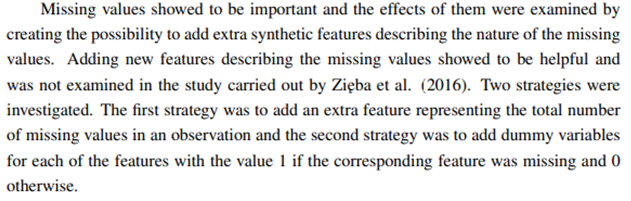

This image comes from Reference 7 of the References Section.

### Creation of X_missing
The X_missing variable is a dummy variable that signifies for a given column of X whether a row in the X column is missing (given a value of 1) or not (a value of 0).

In [109]:
# This creates the path needed to import functions from
# nulls.py.
null_path = ".."

In [110]:
# This changes the current working directory in order to import
# functions from nulls.py.
os.chdir(null_path)

# This imports the necessary functions from nulls.py.
from nulls import xnames_creator, missing_names_converter, actual_null_creator

# This creates the variable initial_xnames.
initial_xnames = xnames_creator()

# This creates the initial_xmissings variable.
initial_xmissings = missing_names_converter(initial_xnames)

### clean_yr1 x_missing

In [111]:
# This checks initial_xnames, which is necessary for 
# the creation of x_missings.
print(initial_xnames[0:5], initial_xnames[-5:])

['X1', 'X2', 'X3', 'X4', 'X5'] ['X60', 'X61', 'X62', 'X63', 'X64']


In [112]:
# This checks initial_xmissings. These are simply the names
# of the X_missing variables.
print(initial_xmissings[0:5], initial_xmissings[-5:])

['X1_missing', 'X2_missing', 'X3_missing', 'X4_missing', 'X5_missing'] ['X60_missing', 'X61_missing', 'X62_missing', 'X63_missing', 'X64_missing']


In [113]:
# This creates the dummy variables, X_missings for
# clean_yr1.
clean_yr1 = actual_null_creator(clean_yr1, initial_xnames, initial_xmissings)

In [114]:
# This determines whether the variables were created.
list(clean_yr1.columns)

['X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X7',
 'X8',
 'X9',
 'X10',
 'X11',
 'X12',
 'X13',
 'X14',
 'X15',
 'X16',
 'X17',
 'X18',
 'X19',
 'X20',
 'X21',
 'X22',
 'X23',
 'X24',
 'X25',
 'X26',
 'X27',
 'X28',
 'X29',
 'X30',
 'X31',
 'X32',
 'X33',
 'X34',
 'X35',
 'X36',
 'X37',
 'X38',
 'X39',
 'X40',
 'X41',
 'X42',
 'X43',
 'X44',
 'X45',
 'X46',
 'X47',
 'X48',
 'X49',
 'X50',
 'X51',
 'X52',
 'X53',
 'X54',
 'X55',
 'X56',
 'X57',
 'X58',
 'X59',
 'X60',
 'X61',
 'X62',
 'X63',
 'X64',
 'X1_missing',
 'X2_missing',
 'X3_missing',
 'X4_missing',
 'X5_missing',
 'X6_missing',
 'X7_missing',
 'X8_missing',
 'X9_missing',
 'X10_missing',
 'X11_missing',
 'X12_missing',
 'X13_missing',
 'X14_missing',
 'X15_missing',
 'X16_missing',
 'X17_missing',
 'X18_missing',
 'X19_missing',
 'X20_missing',
 'X21_missing',
 'X22_missing',
 'X23_missing',
 'X24_missing',
 'X25_missing',
 'X26_missing',
 'X27_missing',
 'X28_missing',
 'X29_missing',
 'X30_missing',
 'X31_missing',
 'X32_miss

In [115]:
# This assesses the "NaN" values of "X4."
# This comes from Reference 6 in the References Section.
clean_yr1['X4'].value_counts(dropna=False)

NaN             29
 1.247600        5
 1.517200        4
 1.302000        4
 1.245500        4
 1.558200        4
 1.760600        4
 1.114600        4
 1.240900        4
 1.812500        3
 1.176400        3
 1.766600        3
 1.746500        3
 1.271900        3
 1.069300        3
 1.655800        3
 1.420200        3
 1.064900        3
 1.212200        3
 1.066700        3
 1.576700        3
 1.032200        3
 1.606600        3
 1.225600        3
 1.021000        3
 1.555800        3
 1.003400        3
 1.200300        3
 1.355300        3
 1.276100        3
 2.049300        3
 1.133900        3
 1.261200        3
 2.046900        3
 1.453900        3
 1.238500        3
 1.353800        3
 1.389600        3
 1.538700        3
 1.200000        3
 1.107100        3
 1.076900        3
 1.930800        3
 1.025900        3
 1.242400        3
 1.111400        3
 2.080900        3
 1.717500        3
 1.831900        3
 1.016500        3
 2.137600        3
 1.255500        3
 1.160400   

In [116]:
# Notice that the number of "NaN" values for "X4"
# of clean_yr1 were 29. The number of 1 values should
# also be 29.
clean_yr1['X4_missing'].value_counts()

0    6916
1      29
Name: X4_missing, dtype: int64

### clean_yr1 x_missing results:
The X_missing dummy variables were successfully created.

### clean_yr2 x_missing:

In [117]:
# This creates the dummy variables, X_missings for
# clean_yr2.
clean_yr2 = actual_null_creator(clean_yr2, initial_xnames, initial_xmissings)

In [118]:
# This determines whether the variables were created.
list(clean_yr2.columns)

['X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X7',
 'X8',
 'X9',
 'X10',
 'X11',
 'X12',
 'X13',
 'X14',
 'X15',
 'X16',
 'X17',
 'X18',
 'X19',
 'X20',
 'X21',
 'X22',
 'X23',
 'X24',
 'X25',
 'X26',
 'X27',
 'X28',
 'X29',
 'X30',
 'X31',
 'X32',
 'X33',
 'X34',
 'X35',
 'X36',
 'X37',
 'X38',
 'X39',
 'X40',
 'X41',
 'X42',
 'X43',
 'X44',
 'X45',
 'X46',
 'X47',
 'X48',
 'X49',
 'X50',
 'X51',
 'X52',
 'X53',
 'X54',
 'X55',
 'X56',
 'X57',
 'X58',
 'X59',
 'X60',
 'X61',
 'X62',
 'X63',
 'X64',
 'X1_missing',
 'X2_missing',
 'X3_missing',
 'X4_missing',
 'X5_missing',
 'X6_missing',
 'X7_missing',
 'X8_missing',
 'X9_missing',
 'X10_missing',
 'X11_missing',
 'X12_missing',
 'X13_missing',
 'X14_missing',
 'X15_missing',
 'X16_missing',
 'X17_missing',
 'X18_missing',
 'X19_missing',
 'X20_missing',
 'X21_missing',
 'X22_missing',
 'X23_missing',
 'X24_missing',
 'X25_missing',
 'X26_missing',
 'X27_missing',
 'X28_missing',
 'X29_missing',
 'X30_missing',
 'X31_missing',
 'X32_miss

In [119]:
# This assesses the "NaN" values of "X4."
# This comes from Reference 6 in the References Section.
clean_yr2['X4'].value_counts(dropna=False)

NaN             22
 1.300000        5
 1.627600        4
 1.433700        4
 1.178800        4
 1.035700        4
 1.074200        4
 1.039300        4
 1.311900        4
 1.171600        4
 1.110100        4
 1.316300        4
 1.387900        4
 1.154000        4
 1.066100        4
 1.084100        4
 1.279500        4
 1.188200        3
 1.465000        3
 1.067700        3
 1.337500        3
 1.271600        3
 1.052300        3
 1.202400        3
 1.248500        3
 1.394200        3
 1.359800        3
 2.544000        3
 1.328300        3
 1.281800        3
 1.320500        3
 1.609700        3
 1.017500        3
 1.182000        3
 2.017100        3
 1.343400        3
 1.170800        3
 1.963300        3
 1.188000        3
 1.408000        3
 1.275800        3
 1.043900        3
 1.289300        3
 1.227500        3
 1.651300        3
 1.332600        3
 1.135100        3
 2.159600        3
 1.375400        3
 1.309700        3
 2.521200        3
 1.061700        3
 1.445800   

In [120]:
# Notice that the number of "NaN" values for "X4"
# of clean_yr2 were 22. The number of 1 values should
# also be 22.v
clean_yr2['X4_missing'].value_counts()

0    10073
1       22
Name: X4_missing, dtype: int64

### clean_yr2 x_missing results:
The X_missing dummy variables were successfully created.

### clean_yr3 x_missing

In [121]:
# This creates the dummy variables, X_missings for
# clean_yr3.
clean_yr3 = actual_null_creator(clean_yr3, initial_xnames, initial_xmissings)

In [122]:
# This determines whether the variables were created.
list(clean_yr3.columns)

['X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X7',
 'X8',
 'X9',
 'X10',
 'X11',
 'X12',
 'X13',
 'X14',
 'X15',
 'X16',
 'X17',
 'X18',
 'X19',
 'X20',
 'X21',
 'X22',
 'X23',
 'X24',
 'X25',
 'X26',
 'X27',
 'X28',
 'X29',
 'X30',
 'X31',
 'X32',
 'X33',
 'X34',
 'X35',
 'X36',
 'X37',
 'X38',
 'X39',
 'X40',
 'X41',
 'X42',
 'X43',
 'X44',
 'X45',
 'X46',
 'X47',
 'X48',
 'X49',
 'X50',
 'X51',
 'X52',
 'X53',
 'X54',
 'X55',
 'X56',
 'X57',
 'X58',
 'X59',
 'X60',
 'X61',
 'X62',
 'X63',
 'X64',
 'X1_missing',
 'X2_missing',
 'X3_missing',
 'X4_missing',
 'X5_missing',
 'X6_missing',
 'X7_missing',
 'X8_missing',
 'X9_missing',
 'X10_missing',
 'X11_missing',
 'X12_missing',
 'X13_missing',
 'X14_missing',
 'X15_missing',
 'X16_missing',
 'X17_missing',
 'X18_missing',
 'X19_missing',
 'X20_missing',
 'X21_missing',
 'X22_missing',
 'X23_missing',
 'X24_missing',
 'X25_missing',
 'X26_missing',
 'X27_missing',
 'X28_missing',
 'X29_missing',
 'X30_missing',
 'X31_missing',
 'X32_miss

In [123]:
# This assesses the "NaN" values of "X4."
# This comes from Reference 6 in the References Section.
clean_yr3['X4'].value_counts(dropna=False)

NaN              18
 1.053500         4
 1.268500         4
 2.204700         4
 1.208100         4
 1.134400         4
 1.544600         4
 1.068400         4
 1.240900         4
 1.399200         4
 1.389600         4
 1.646100         4
 3.972700         4
 1.223000         4
 1.152000         4
 1.148200         4
 1.239300         4
 1.027100         3
 1.035100         3
 1.654700         3
 1.410000         3
 1.286400         3
 1.109000         3
 1.494000         3
 1.674100         3
 1.420000         3
 1.100500         3
 1.024700         3
 1.277200         3
 1.755200         3
 1.085500         3
 1.591800         3
 1.019700         3
 1.176200         3
 1.349300         3
 1.343100         3
 1.148600         3
 1.277700         3
 1.019100         3
 1.526200         3
 2.780200         3
 1.237400         3
 1.560800         3
 1.471100         3
 1.001400         3
 1.049400         3
 1.647000         3
 1.307900         3
 1.661000         3
 1.694000         3


In [124]:
# Notice that the number of "NaN" values for "X4"
# of clean_yr3 were 18. The number of 1 values should
# also be 18.
clean_yr3['X4_missing'].value_counts()

0    10410
1       18
Name: X4_missing, dtype: int64

### clean_yr3 x_missing results:
The X_missing dummy variables were successfully created.

### clean_yr4 x_missing

In [125]:
# This creates the dummy variables, X_missings for
# clean_yr4.
clean_yr4 = actual_null_creator(clean_yr4, initial_xnames, initial_xmissings)

In [126]:
# This determines whether the variables were created.
list(clean_yr4.columns)

['X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X7',
 'X8',
 'X9',
 'X10',
 'X11',
 'X12',
 'X13',
 'X14',
 'X15',
 'X16',
 'X17',
 'X18',
 'X19',
 'X20',
 'X21',
 'X22',
 'X23',
 'X24',
 'X25',
 'X26',
 'X27',
 'X28',
 'X29',
 'X30',
 'X31',
 'X32',
 'X33',
 'X34',
 'X35',
 'X36',
 'X37',
 'X38',
 'X39',
 'X40',
 'X41',
 'X42',
 'X43',
 'X44',
 'X45',
 'X46',
 'X47',
 'X48',
 'X49',
 'X50',
 'X51',
 'X52',
 'X53',
 'X54',
 'X55',
 'X56',
 'X57',
 'X58',
 'X59',
 'X60',
 'X61',
 'X62',
 'X63',
 'X64',
 'X1_missing',
 'X2_missing',
 'X3_missing',
 'X4_missing',
 'X5_missing',
 'X6_missing',
 'X7_missing',
 'X8_missing',
 'X9_missing',
 'X10_missing',
 'X11_missing',
 'X12_missing',
 'X13_missing',
 'X14_missing',
 'X15_missing',
 'X16_missing',
 'X17_missing',
 'X18_missing',
 'X19_missing',
 'X20_missing',
 'X21_missing',
 'X22_missing',
 'X23_missing',
 'X24_missing',
 'X25_missing',
 'X26_missing',
 'X27_missing',
 'X28_missing',
 'X29_missing',
 'X30_missing',
 'X31_missing',
 'X32_miss

In [127]:
# This assesses the "NaN" values of "X4."
# This comes from Reference 6 in the References Section.
clean_yr4['X4'].value_counts(dropna=False)

NaN              43
 1.482800         5
 1.211900         4
 1.700100         4
 1.381100         4
 1.245400         4
 1.071900         4
 1.465400         4
 1.728200         4
 1.051500         4
 1.159800         4
 1.026500         4
 1.485000         4
 1.067800         3
 1.849400         3
 1.041200         3
 1.245100         3
 1.037700         3
 2.172300         3
 1.184600         3
 1.112300         3
 1.185700         3
 1.528000         3
 1.509400         3
 1.869600         3
 1.126100         3
 1.130600         3
 4.331900         3
 2.029200         3
 1.129500         3
 1.050700         3
 1.168100         3
 1.152500         3
 2.219900         3
 1.841200         3
 1.174400         3
 1.108000         3
 1.618200         3
 1.322000         3
 1.776800         3
 1.455800         3
 1.948400         3
 1.520800         3
 1.000600         3
 1.136500         3
 1.162600         3
 1.103400         3
 1.573900         3
 1.125400         3
 1.184700         3


In [128]:
# Notice that the number of "NaN" values for "X4"
# of clean_yr4 were 43. The number of 1 values should
# also be 43.
clean_yr4['X4_missing'].value_counts()

0    9667
1      43
Name: X4_missing, dtype: int64

### clean_yr4 x_missing results:
The X_missing dummy variables were successfully created.

### clean_yr5 x_missing

In [129]:
# This creates the dummy variables, X_missings for
# clean_yr5.
clean_yr5 = actual_null_creator(clean_yr5, initial_xnames, initial_xmissings)

In [130]:
# This determines whether the variables were created.
list(clean_yr5.columns)

['X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X7',
 'X8',
 'X9',
 'X10',
 'X11',
 'X12',
 'X13',
 'X14',
 'X15',
 'X16',
 'X17',
 'X18',
 'X19',
 'X20',
 'X21',
 'X22',
 'X23',
 'X24',
 'X25',
 'X26',
 'X27',
 'X28',
 'X29',
 'X30',
 'X31',
 'X32',
 'X33',
 'X34',
 'X35',
 'X36',
 'X37',
 'X38',
 'X39',
 'X40',
 'X41',
 'X42',
 'X43',
 'X44',
 'X45',
 'X46',
 'X47',
 'X48',
 'X49',
 'X50',
 'X51',
 'X52',
 'X53',
 'X54',
 'X55',
 'X56',
 'X57',
 'X58',
 'X59',
 'X60',
 'X61',
 'X62',
 'X63',
 'X64',
 'X1_missing',
 'X2_missing',
 'X3_missing',
 'X4_missing',
 'X5_missing',
 'X6_missing',
 'X7_missing',
 'X8_missing',
 'X9_missing',
 'X10_missing',
 'X11_missing',
 'X12_missing',
 'X13_missing',
 'X14_missing',
 'X15_missing',
 'X16_missing',
 'X17_missing',
 'X18_missing',
 'X19_missing',
 'X20_missing',
 'X21_missing',
 'X22_missing',
 'X23_missing',
 'X24_missing',
 'X25_missing',
 'X26_missing',
 'X27_missing',
 'X28_missing',
 'X29_missing',
 'X30_missing',
 'X31_missing',
 'X32_miss

In [131]:
# This assesses the "NaN" values of "X4."
# This comes from Reference 6 in the References Section.
clean_yr5['X4'].value_counts(dropna=False)

NaN             21
 1.665600        3
 1.769200        3
 1.047500        3
 1.939300        3
 1.047200        3
 1.285100        3
 1.385900        3
 1.153400        3
 1.167900        3
 1.150100        3
 1.200300        3
 1.045900        3
 1.107200        3
 1.713700        3
 1.509400        3
 1.034400        3
 1.629800        3
 1.029000        3
 1.007400        3
 1.434800        3
 1.642200        3
 1.390500        3
 3.219300        3
 1.041000        3
 1.794400        3
 1.542800        3
 2.338600        3
 3.736800        2
 1.218000        2
 2.158600        2
 1.072600        2
 2.672900        2
 1.090600        2
 1.379300        2
 0.360610        2
 1.822600        2
 1.086200        2
 1.600700        2
 1.938800        2
 1.326900        2
 1.145300        2
 2.069400        2
 1.255300        2
 1.435900        2
 1.316000        2
 1.517300        2
 1.324500        2
 1.306600        2
 1.779900        2
 1.651600        2
 1.308800        2
 1.030700   

In [132]:
# Notice that the number of "NaN" values for "X4"
# of clean_yr5 were 21. The number of 1 values should
# also be 21.
clean_yr5['X4_missing'].value_counts()

0    5829
1      21
Name: X4_missing, dtype: int64

### clean_yr5 x_missing results:
The X_missing dummy variables were successfully created.

### Creation of missing_count
The missing_count variable counts how many null values there are in a given row of data.

### clean_yr1 missing_count:

In [133]:
# This imports the missing_counter function from
# nulls.py.
from nulls import missing_counter

In [134]:
# This creates the 'missing_count' variable in 
# clean_yr_1.
clean_yr1 = missing_counter(clean_yr1)

In [135]:
# This determines whether 'missing_count'
# was successfully created in clean_yr_1.
clean_yr1['missing_count'].value_counts(dropna = False)

0     3151
1     2659
2      841
3      164
4       48
5       28
6       14
15      10
7        8
14       7
8        6
13       3
9        2
40       1
20       1
33       1
19       1
Name: missing_count, dtype: int64

In [136]:
# This determines whether the data type for 'missing_count'
# is in integer format in clean_yr1.
clean_yr1['missing_count'].dtype

dtype('int64')

### clean_yr1 missing_count results:
The missing count variable was successfully created.

### clean_yr2 missing_count:

In [137]:
# This creates the 'missing_count' variable in 
# clean_yr2.
clean_yr2 = missing_counter(clean_yr2)

In [138]:
# This determines whether 'missing_count'
# was successfully created in clean_yr2.
clean_yr2['missing_count'].value_counts(dropna = False)

1     3321
2     2777
3     1220
22     726
21     722
23     344
4      328
5      185
24      85
7       77
6       73
25      48
8       32
9       25
26      21
10      21
27      12
29      10
28       9
18       7
17       6
36       6
37       5
16       5
19       4
20       3
13       3
31       2
44       2
30       2
38       2
40       2
15       2
11       1
34       1
35       1
45       1
14       1
56       1
54       1
39       1
Name: missing_count, dtype: int64

In [139]:
# This determines whether the data type for 'missing_count'
# is in integer format in clean_yr2.
clean_yr2['missing_count'].dtype

dtype('int64')

### clean_yr2 missing_count results:
The missing count variable was successfully created.

### clean_yr3 missing_count:

In [140]:
# This creates the 'missing_count' variable in 
# clean_yr3.
clean_yr3 = missing_counter(clean_yr3)

In [141]:
# This determines whether 'missing_count'
# was successfully created in clean_yr3.
clean_yr3['missing_count'].value_counts(dropna = False)

0     3823
1     3062
2     1617
3     1174
4      326
5      169
6       77
7       73
8       32
17      10
10      10
22       8
14       7
9        7
18       6
23       4
15       3
19       3
20       3
11       3
13       2
16       2
21       2
34       1
27       1
35       1
32       1
24       1
Name: missing_count, dtype: int64

In [142]:
# This determines whether the data type for 'missing_count'
# is in integer format in clean_yr4.
clean_yr3['missing_count'].dtype

dtype('int64')

### clean_yr3 missing_count results:
The missing count variable was successfully created.

### clean_yr4 missing_count:

In [143]:
# This creates the 'missing_count' variable in 
# clean_yr4.
clean_yr4 = missing_counter(clean_yr4)

In [144]:
# This determines whether 'missing_count'
# was successfully created in clean_yr4.
clean_yr4['missing_count'].value_counts(dropna = False)

2     4034
3     3027
25     686
26     624
4      437
5      277
27     140
7       92
6       85
28      52
9       44
8       37
29      27
30      23
10      21
31      14
12      12
32      12
16      10
33       8
11       6
34       6
19       5
20       5
17       3
13       3
14       3
15       3
18       2
23       2
21       2
24       1
41       1
43       1
35       1
50       1
22       1
42       1
36       1
Name: missing_count, dtype: int64

In [145]:
# This determines whether the data type for 'missing_count'
# is in integer format in clean_yr4.
clean_yr4['missing_count'].dtype

dtype('int64')

### clean_yr4 missing_count results:
The missing count variable was successfully created.

### clean_yr5 missing_count:

In [146]:
# This creates the 'missing_count' variable in 
# clean_yr5.
clean_yr5 = missing_counter(clean_yr5)

In [147]:
# This determines whether 'missing_count'
# was successfully created in clean_yr5.
clean_yr5['missing_count'].value_counts(dropna = False)

0     2995
1     2167
2      334
3      159
4       61
5       46
7       26
6       24
8       13
14       7
9        5
20       4
15       2
41       1
17       1
32       1
28       1
16       1
12       1
19       1
Name: missing_count, dtype: int64

In [148]:
# This determines whether the data type for 'missing_count'
# is in integer format in clean_yr5.
clean_yr5['missing_count'].dtype

dtype('int64')

### clean_yr5 missing_count results:
The missing count variable was successfully created.

<a id='numpy'></a>
## Pandas Dataframe to Numpy Array
Before the data can be put into the Multi Layer Perceptron algorithm, the data must be separated into training and testing data.

In [149]:
# This converts all the feature variables to numpy arrays.
X_np_yr1 = np.array(clean_yr1)
X_np_yr2 = np.array(clean_yr2)
X_np_yr3 = np.array(clean_yr3)
X_np_yr4 = np.array(clean_yr4)
X_np_yr5 = np.array(clean_yr5)

In [150]:
# This converts all the target variables to numpy arrays.
y_np_yr1 = np.array(target_yr1)
y_np_yr2 = np.array(target_yr2)
y_np_yr3 = np.array(target_yr3)
y_np_yr4 = np.array(target_yr4)
y_np_yr5 = np.array(target_yr5)

<a id='standardization'></a>
## Standardization
This standardizes the scale of each x feature so that an individual x feature does not carry more weight in predicting bankruptcy outcomes, simply because the range of a given x feature is greater than the others. In standardization, each feature's mean is transformed to 0 and the standard deviation is 1 (Reference 9).

In [151]:
# This imports the StandardScalar class that will
# be used to standardized the X variables for each of the
# five years.
# This code comes from Reference 10 in References.
from sklearn.preprocessing import StandardScaler

In [152]:
# This standardizes all the x values in year 1.
scaler1 = StandardScaler()
scaler1.fit(X_np_yr1)
X1_standardized = scaler1.transform(X_np_yr1)

In [153]:
# This standardizes all the x values in year 2.
scaler2 = StandardScaler()
scaler2.fit(X_np_yr2)
X2_standardized = scaler2.transform(X_np_yr2)

In [154]:
# This standardizes all the x values in year 3.
scaler3 = StandardScaler()
scaler3.fit(X_np_yr3)
X3_standardized = scaler3.transform(X_np_yr3)

In [155]:
# This standardizes all the x values in year 4.
scaler4 = StandardScaler()
scaler4.fit(X_np_yr4)
X4_standardized = scaler4.transform(X_np_yr4)

In [156]:
# This standardizes all the x values in year 5.
scaler5 = StandardScaler()
scaler5.fit(X_np_yr5)
X5_standardized = scaler5.transform(X_np_yr5)

<a id='train_test_split'></a>
## Train_test_split
Before the data can be put into the Multi Layer Perceptron algorithm, the data must be separated into training and testing data.

In [157]:
# This imports train_test_split.
from sklearn.model_selection import train_test_split

# This sets the random state variable for reproduceable results.
random_state_variable = 42

# This determines the proportion set aside for testing data
# in the splitting process.
# The test proportion came from Reference 8.
test_proportion = 0.2

In [158]:
# This splits the data for year 1.
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1_standardized, y_np_yr1, test_size = test_proportion,
    random_state = random_state_variable) 

In [159]:
# This splits the data for year 2.
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2_standardized, y_np_yr2, test_size = test_proportion,
    random_state = random_state_variable)

In [160]:
# This splits the data for year 3.
X3_train, X3_test, y3_train, y3_test = train_test_split(
    X3_standardized, y_np_yr3, test_size = test_proportion,
    random_state = random_state_variable)

In [161]:
# This splits the data for year 4.
X4_train, X4_test, y4_train, y4_test = train_test_split(
    X4_standardized, y_np_yr4, test_size = test_proportion,
    random_state = random_state_variable)

In [162]:
# This splits the data for year 5.
X5_train, X5_test, y5_train, y5_test = train_test_split(
    X5_standardized, y_np_yr5, test_size = test_proportion,
    random_state = random_state_variable)

<a id='oversampling'></a>
## Oversampling
This section oversamples the data. The number of companies that are not bankrupt far suprasses the number of companies that are bankrupt, which means the dataset is imbalanced. Imbalanced datasets can encourage algorithms to be lazy and simply predict the majority (not-bankrupt) class. However, one can dissuade a lazy algorithm by randomly pulling samples with replacement from the minority class until the number of minority instances equals that of the majority instances. In this case, this section will make the number of bankrupt cases in the training data equal to that of the non-bankrupt cases (Reference 11).

### Year 1

In [163]:
# This imports the oversample function.
from pre_processing import oversample

In [164]:
# This oversamples the minority class (bankrupt), and 
# makes the number of the minority class equal to that of
# the majority class (not bankrupt) for year 1 data.
X_1_oversampled, y_1_oversampled = oversample(
    X1_train, y1_train)

In [165]:
# This checks whether the oversampling was successful
# for y_1_oversampled.
# This comes from Reference 12 in References.
unique_elements, counts_elements = np.unique(y_1_oversampled,
                                             return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[   0    1]
 [5328 5328]]


### Year 2

In [166]:
# This oversamples the minority class (bankrupt), and 
# makes the number of the minority class equal to that of
# the majority class (not bankrupt) for year 2 data.
X_2_oversampled, y_2_oversampled = oversample(
    X2_train, y2_train)

In [167]:
# This checks whether the oversampling was successful
# for y_2_oversampled.
# This comes from Reference 12 in References.
unique_elements, counts_elements = np.unique(y_2_oversampled,
                                             return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[   0    1]
 [7759 7759]]


### Year 3

In [168]:
# This oversamples the minority class (bankrupt), and 
# makes the number of the minority class equal to that of
# the majority class (not bankrupt) for year 3 data.
X_3_oversampled, y_3_oversampled = oversample(
    X3_train, y3_train)

In [169]:
# This checks whether the oversampling was successful
# for y_3_oversampled.
# This comes from Reference 12 in References.
unique_elements, counts_elements = np.unique(y_3_oversampled,
                                             return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[   0    1]
 [7937 7937]]


### Year 4

In [170]:
# This oversamples the minority class (bankrupt), and 
# makes the number of the minority class equal to that of
# the majority class (not bankrupt) for year 4 data.
X_4_oversampled, y_4_oversampled = oversample(
    X4_train, y4_train)

In [171]:
# This checks whether the oversampling was successful
# for y_4_oversampled.
# This comes from Reference 12 in References.
unique_elements, counts_elements = np.unique(y_4_oversampled,
                                             return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[   0    1]
 [7365 7365]]


### Year 5

In [172]:
# This oversamples the minority class (bankrupt), and 
# makes the number of the minority class equal to that of
# the majority class (not bankrupt) for year 5 data.
X_5_oversampled, y_5_oversampled = oversample(
    X5_train, y5_train)

In [173]:
# This checks whether the oversampling was successful
# for y_5_oversampled.
# This comes from Reference 12 in References.
unique_elements, counts_elements = np.unique(y_5_oversampled,
                                             return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[   0    1]
 [4360 4360]]


<a id='originalMLP'></a>
## Original MLP
Mattson and Steinert created an MLP with the following hyperparameters: a stochastic gradient descent loss optimizer, the use of the ReLU activation function on the input and hidden layers, the use of dropout (with 0.5 probability) on the input and hidden layers, L2 regularization on the weights (with a factor of 0.001), 100 epochs, and a batch size of 50 (Reference 7). While the algorithm in this section attempts to replicate their MLP, there are a few hyperparameters that they did not specify in their research, such as the number of hidden layers. While this algorithm uses their defined hyperparameters, the other hyperparemeters are set to my discretion. Also, I attempt to duplicate the results that they found with their MLP, which can be found in the top row of the table below.

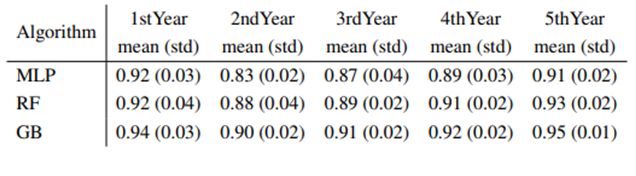

This image comes from Reference 7 in References.

In [182]:
# This imports the necessary model and layers from keras
# for the the MLP models.
# This comes from Reference 13 in Referenes.
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras import regularizers

In [ ]:
# This creates the Original MLP model for the first year of data.
# This comes from Reference 13 in References.
model_OG_yr1 = Sequential()

# This sets the original hyperparameters from Mattson and Steinert
# model.
# This comes from Reference 7 in References.
OG_dropout_rate = 0.5
OG_l2_factor = 0.001
OG_relu = 'relu'

# These are the 
sigmoid = 'sigmoid'


# This designs the layer of the Original MLP for the first year
# of data.

# This is the input layer.
# This comes from References 13 & 14 in References.
model_OG_yr1.add(Dense(64, activation = OG_relu,
                kernel_regularizer = regularizers.l2(OG_l2_factor),
                input_dim = np.size(X_1_oversampled,1)))
model_OG_yr1.add(Dropout(OG_dropout_rate))

# This is the first hidden layer.
# This comes from Reference 13 in References.
model_OG_yr1.add(Dense(32, activation = OG_relu,
                kernel_regularizer = regularizers.l2(OG_l2_factor)))
model_OG_yr1.add(Dropout(OG_dropout_rate))

# This is the second hidden layer.
# This comes from Reference 13 in References.
model_OG_yr1.add(Dense(16, activation = OG_relu,
                kernel_regularizer = regularizers.l2(OG_l2_factor)))
model_OG_yr1.add(Dropout(OG_dropout_rate))

# This is the binary output (bankrupt or not bankrupt) layer.
# This comes from Reference 13 in References.
model_OG_yr1.add(Dense(1, activation = sigmoid))
model_OG_yr1.compile()

<a id='references'></a>
## References

1. https://discuss.analyticsvidhya.com/t/how-to-display-full-dataframe-in-pandas/23298
2. https://github.com/brian-campbell-said-mba18/Udacity-DAND-Project-7-Dog-Tweet-Analysis/blob/master/wrangle_act.ipynb
3. https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns-using-dataframe-duplicated-in-python/
4. https://datatofish.com/convert-string-to-float-dataframe/
5. https://www.geeksforgeeks.org/python-pandas-dataframe-drop_duplicates/
6. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html
7. https://pdfs.semanticscholar.org/cd5f/aff7c02bcba0b3f7f438d4d1c38c3d30d43e.pdf
8. https://stackoverflow.com/questions/13610074/is-there-a-rule-of-thumb-for-how-to-divide-a-dataset-into-training-and-validatio
9. https://becominghuman.ai/demystifying-feature-scaling-baff53e9b3fd
10. https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/
11. https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18
12. https://www.w3resource.com/python-exercises/numpy/python-numpy-exercise-94.php
13. https://keras.io/getting-started/sequential-model-guide/
14. https://docs.scipy.org/doc/numpy/reference/generated/numpy.ma.size.html